<center><h2><span style="font-weight:bolder; font-size:110%",>England Weather Analysis</span></h2></center>


Data Column
- Formatted Date: Displays the timestamp for each sample in the dataset.
- Summary: Provides a succinct description of the weather condition.
- Precip Type: Indicates whether there is rainfall or snowfall at the timestamp.
- Temperature (C): Indicates the temperature in degrees Celsius.
- Wind Speed (km/h): Represents the wind speed in kilometers per hour.
- Pressure (millibars): Displays the air pressure in millibars.
- Humidity: Illustrates the relative humidity.



Preprocessing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from math import ceil
plt.style.use('_mpl-gallery')

In [10]:
# importing data
data = pd.read_csv('EnglandWeather\EnglandWeather.csv')
data

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)  Humidity  
0             9.472222            14.1197               1015.13      0.89  
1             9.355556            14.2646               1015.63      0.86  
2             9.377778             3.9284               1015.94      0.89  
3             8.288889            14.1036               1016.41      0.83  
4             8.755556            11.0446               1016.51      0.83  
...                ...                ...                   ...       ...  
96448        26.016667            10.9963               1014.36      0.43  
96449        24.583333            10.0947               1015.16      0.48  
96450        22.038889             8.9838               1015.66      0.56  
96451        21.522222            10.5294               1015.95      0.60  
96452        20.438889             5.8765               1016.16      0.61  

[96453 rows x 7 columns]

In [11]:
df = pd.DataFrame(data)
df_rows_count, df_columns_count = df.shape
print(f'number of samples: {df_rows_count}')
print(f'number of columns: {df_columns_count}')
df.head(7)

number of samples: 96453
number of columns: 7


Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   
5  2006-04-01 05:00:00.000 +0200  Partly Cloudy        rain         9.222222   
6  2006-04-01 06:00:00.000 +0200  Partly Cloudy        rain         7.733333   

   Wind Speed (km/h)  Pressure (millibars)  Humidity  
0            14.1197               1015.13      0.89  
1            14.2646               1015.63      0.86  
2             3.9284               1015.94      0.89  
3            14.1036               1016.41      0.83  
4            11.0446               1016.51      0.83  
5            13.9587               1016.66      0.85  
6            12.3648               1016.72      0.95

In [12]:
# data profilling
def check_df(df: object, head: object = 5) -> object:
    print("\nShape")
    print(df.shape)
    print("\nTypes")
    print(df.dtypes)
    print("\nNANs")
    print(df.isnull().sum())
    print("\nInfo")
    print(df.info())
check_df(df)


Shape
(96453, 7)

Types
Formatted Date           object
Summary                  object
Precip Type              object
Temperature (C)         float64
Wind Speed (km/h)       float64
Pressure (millibars)    float64
Humidity                float64
dtype: object

NANs
Formatted Date            0
Summary                   0
Precip Type             517
Temperature (C)           0
Wind Speed (km/h)         0
Pressure (millibars)      0
Humidity                  0
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Formatted Date        96453 non-null  object 
 1   Summary               96453 non-null  object 
 2   Precip Type           95936 non-null  object 
 3   Temperature (C)       96453 non-null  float64
 4   Wind Speed (km/h)     96453 non-null  float64
 5   Pressure (millibars)  96453 non-null  float64


In [13]:
print('Number of duplicated rows: ' , len(df[df.duplicated()]))
df[df.duplicated()]

Number of duplicated rows:  24


Formatted Date        Summary Precip Type  \
36072  2010-08-02 00:00:00.000 +0200          Clear        rain   
36073  2010-08-02 01:00:00.000 +0200          Clear        rain   
36074  2010-08-02 02:00:00.000 +0200          Clear        rain   
36075  2010-08-02 03:00:00.000 +0200          Clear        rain   
36076  2010-08-02 04:00:00.000 +0200          Clear        rain   
36077  2010-08-02 05:00:00.000 +0200          Clear        rain   
36078  2010-08-02 06:00:00.000 +0200          Clear        rain   
36079  2010-08-02 07:00:00.000 +0200          Clear        rain   
36080  2010-08-02 08:00:00.000 +0200          Clear        rain   
36081  2010-08-02 09:00:00.000 +0200          Clear        rain   
36082  2010-08-02 10:00:00.000 +0200          Clear        rain   
36083  2010-08-02 11:00:00.000 +0200          Clear        rain   
36084  2010-08-02 12:00:00.000 +0200          Clear        rain   
36085  2010-08-02 13:00:00.000 +0200  Partly Cloudy        rain   
36086  2010-08-02 14:00:00.000 +0200  Partly Cloudy        rain   
36087  2010-08-02 15:00:00.000 +0200  Partly Cloudy        rain   
36088  2010-08-02 16:00:00.000 +0200  Partly Cloudy        rain   
36089  2010-08-02 17:00:00.000 +0200  Partly Cloudy        rain   
36090  2010-08-02 18:00:00.000 +0200  Partly Cloudy        rain   
36091  2010-08-02 19:00:00.000 +0200          Clear        rain   
36092  2010-08-02 20:00:00.000 +0200          Clear        rain   
36093  2010-08-02 21:00:00.000 +0200          Clear        rain   
36094  2010-08-02 22:00:00.000 +0200  Partly Cloudy        rain   
36095  2010-08-02 23:00:00.000 +0200          Clear        rain   

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)  Humidity  
36072        18.800000             6.2790               1016.99      0.93  
36073        18.222222             6.2790               1017.09      0.97  
36074        18.072222            11.2700               1013.23      0.98  
36075        16.622222             6.4400               1016.78      0.99  
36076        16.094444             3.0751               1016.67      0.99  
36077        15.955556             3.8801               1016.69      0.99  
36078        17.088889             6.4400               1017.08      1.00  
36079        20.822222             3.2200               1017.27      0.87  
36080        23.405556             1.8837               1017.27      0.74  
36081        26.050000             1.5939               1017.15      0.59  
36082        27.688889             0.2254               1016.68      0.50  
36083        28.561111             3.2039               1016.58      0.54  
36084        28.816667             1.6100               1016.55      0.49  
36085        28.866667             2.8175               1015.99      0.46  
36086        29.827778             8.0339               1015.50      0.47  
36087        30.072222             2.5921               1014.97      0.46  
36088        31.066667             1.3846               1014.47      0.44  
36089        30.861111             2.2540               1014.08      0.44  
36090        29.950000             3.0751               1013.59      0.46  
36091        28.811111             3.2039               1013.19      0.59  
36092        25.250000             2.4955               1013.20      0.75  
36093        22.172222             1.6100               1013.49      0.87  
36094        21.061111             0.0000               1013.37      0.90  
36095        20.255556             1.0787               1013.00      0.92

In [14]:
# droping dublicated rows
df = df.drop_duplicates()
df

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)  Humidity  
0             9.472222            14.1197               1015.13      0.89  
1             9.355556            14.2646               1015.63      0.86  
2             9.377778             3.9284               1015.94      0.89  
3             8.288889            14.1036               1016.41      0.83  
4             8.755556            11.0446               1016.51      0.83  
...                ...                ...                   ...       ...  
96448        26.016667            10.9963               1014.36      0.43  
96449        24.583333            10.0947               1015.16      0.48  
96450        22.038889             8.9838               1015.66      0.56  
96451        21.522222            10.5294               1015.95      0.60  
96452        20.438889             5.8765               1016.16      0.61  

[96429 rows x 7 columns]

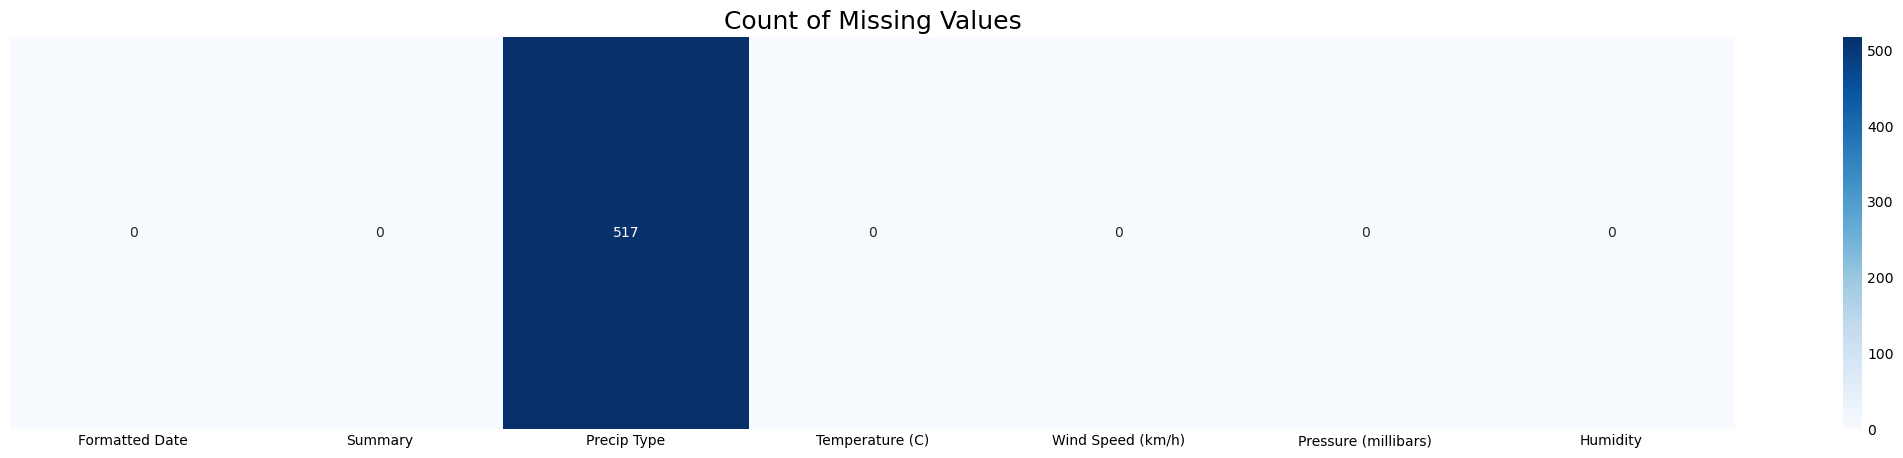

In [81]:
plt.figure(figsize=(22,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='Blues', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

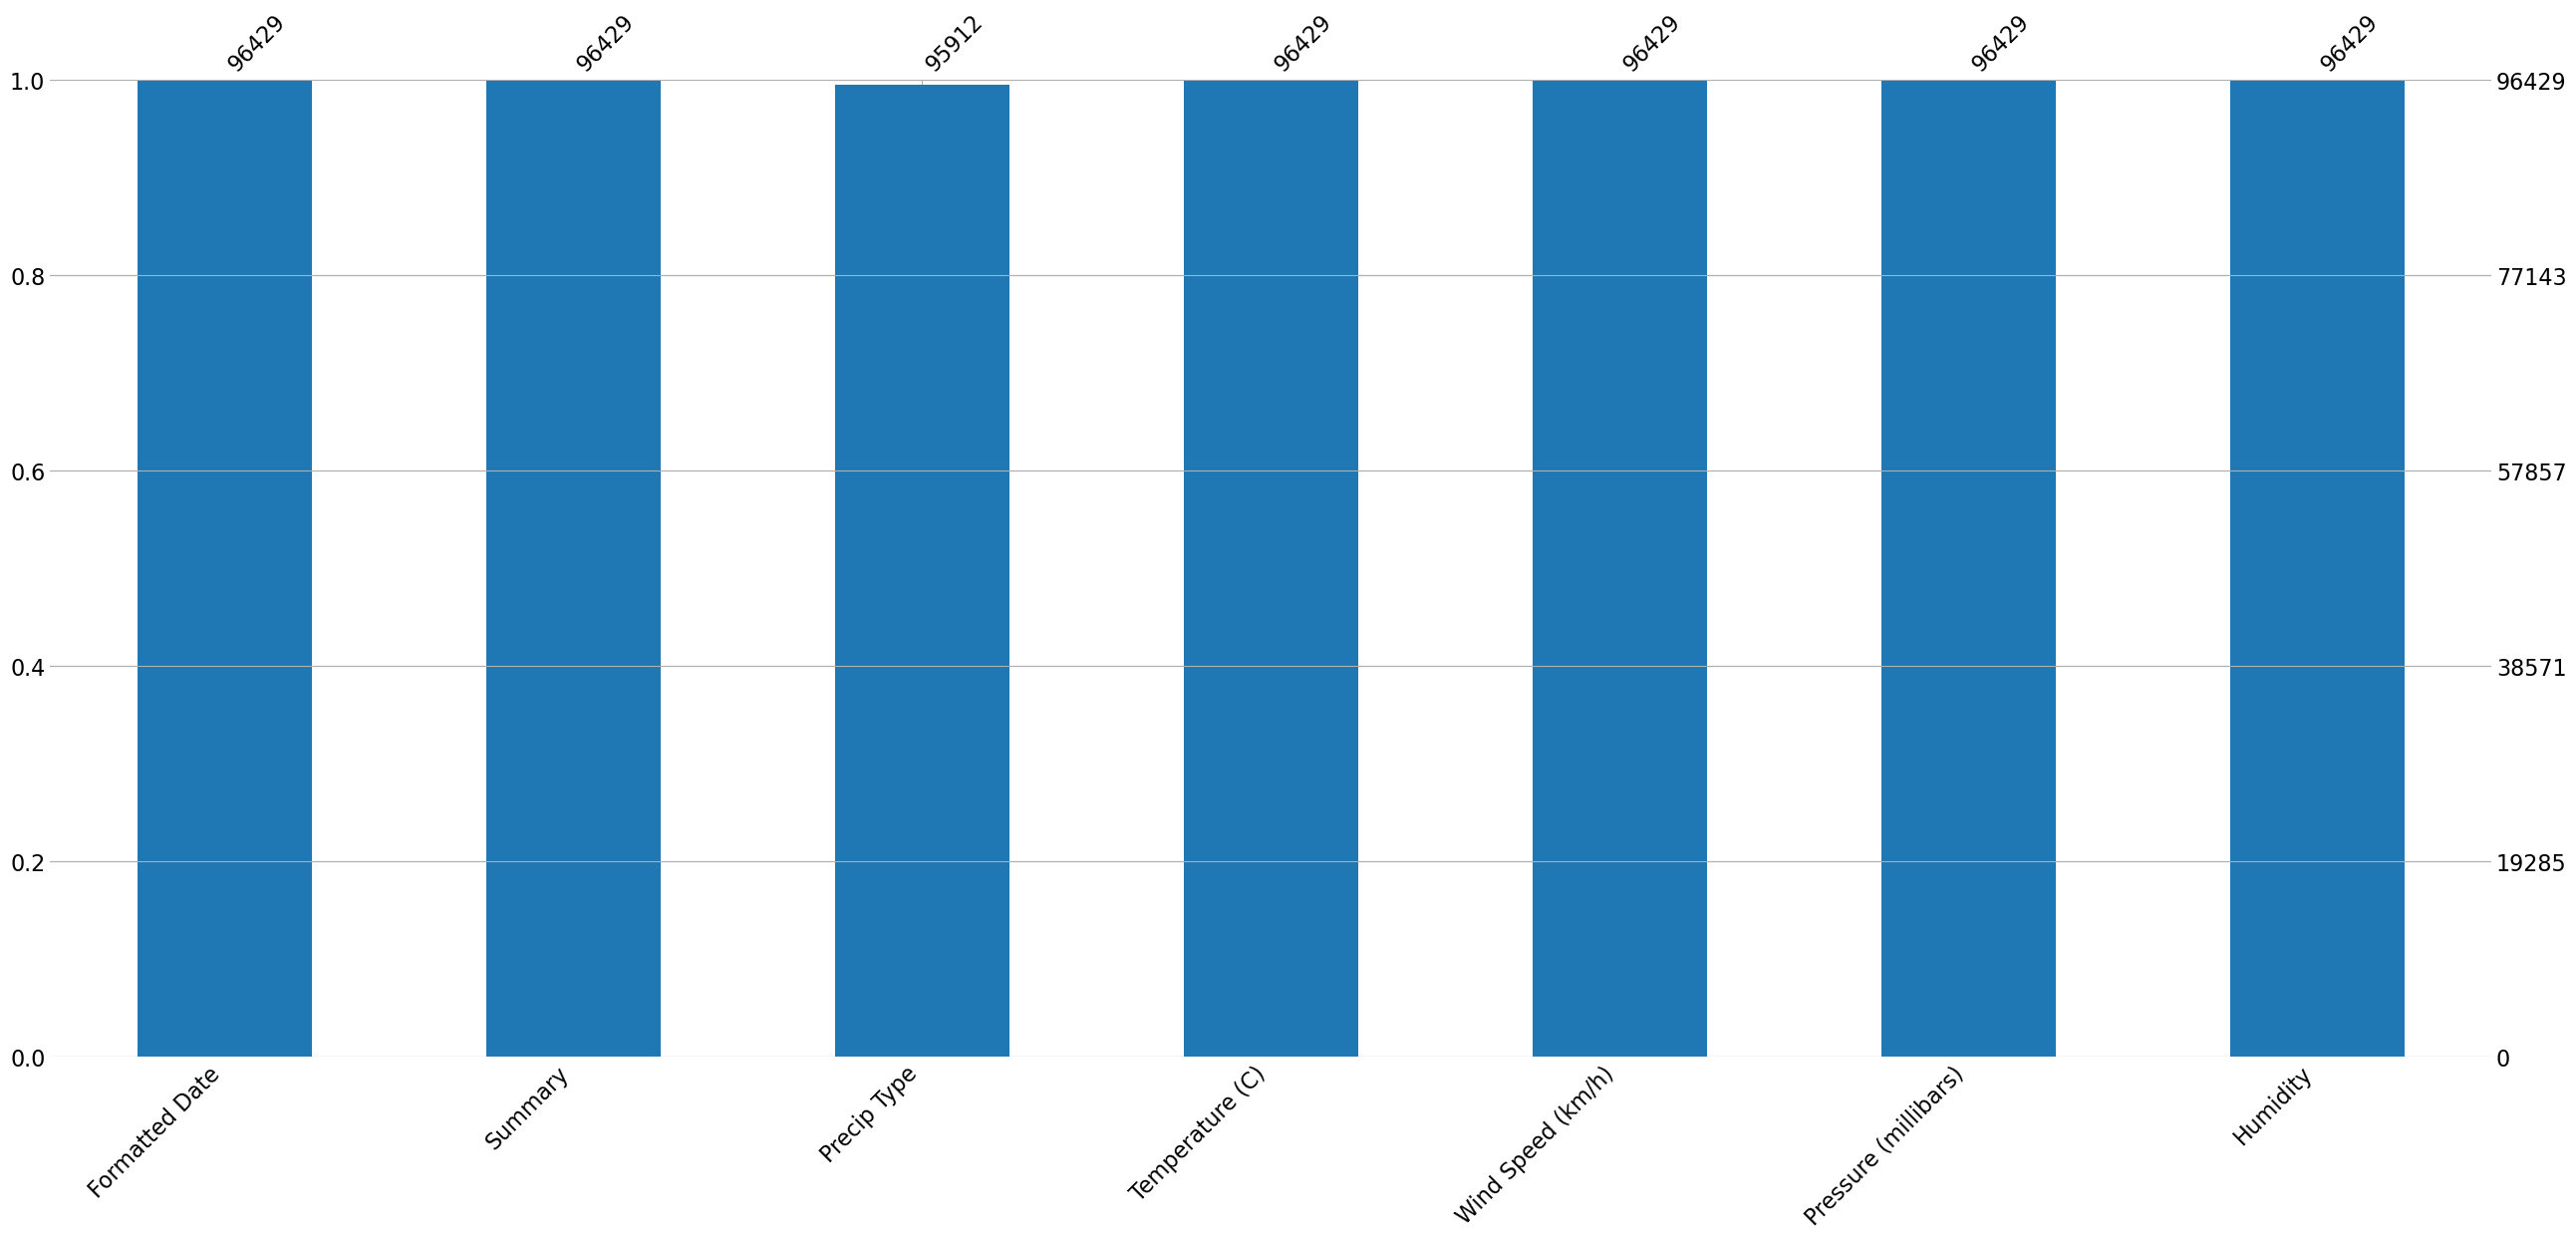

In [83]:
import missingno as msno
msno.bar(df, color='#1f77b4')
plt.show()

In [19]:
# finding unique data
df.apply(lambda x: len(x.unique()))

Formatted Date          96429
Summary                    27
Precip Type                 3
Temperature (C)          7574
Wind Speed (km/h)        2484
Pressure (millibars)     4979
Humidity                   90
dtype: int64

In [20]:
unique = df.nunique().sort_values()
unique_values = df.apply(lambda x: x.unique())
pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

Number of Unique Values  \
Formatted Date                          96429   
Humidity                                   90   
Precip Type                                 2   
Pressure (millibars)                     4979   
Summary                                    27   
Temperature (C)                          7574   
Wind Speed (km/h)                        2484   

                                                          Unique Values  
Formatted Date        [2006-04-01 00:00:00.000 +0200, 2006-04-01 01:...  
Humidity              [0.89, 0.86, 0.83, 0.85, 0.95, 0.82, 0.72, 0.6...  
Precip Type                                           [rain, snow, nan]  
Pressure (millibars)  [1015.13, 1015.63, 1015.94, 1016.41, 1016.51, ...  
Summary               [Partly Cloudy, Mostly Cloudy, Overcast, Foggy...  
Temperature (C)       [9.472222222, 9.355555556, 9.377777778, 8.2888...  
Wind Speed (km/h)     [14.1197, 14.2646, 3.9284, 14.1036, 11.0446, 1...

In [22]:
df.describe()[1:].T.style.background_gradient(cmap='viridis', axis=1)

In [23]:
# separating object & float columns 
df_num = df.select_dtypes(['float64'])
df_obj = df.select_dtypes(['object'])

In [25]:
df_num.describe().T.style.background_gradient(cmap='viridis', axis=1)

In [26]:
df_obj.describe().T.style.background_gradient(cmap='viridis', axis=1)

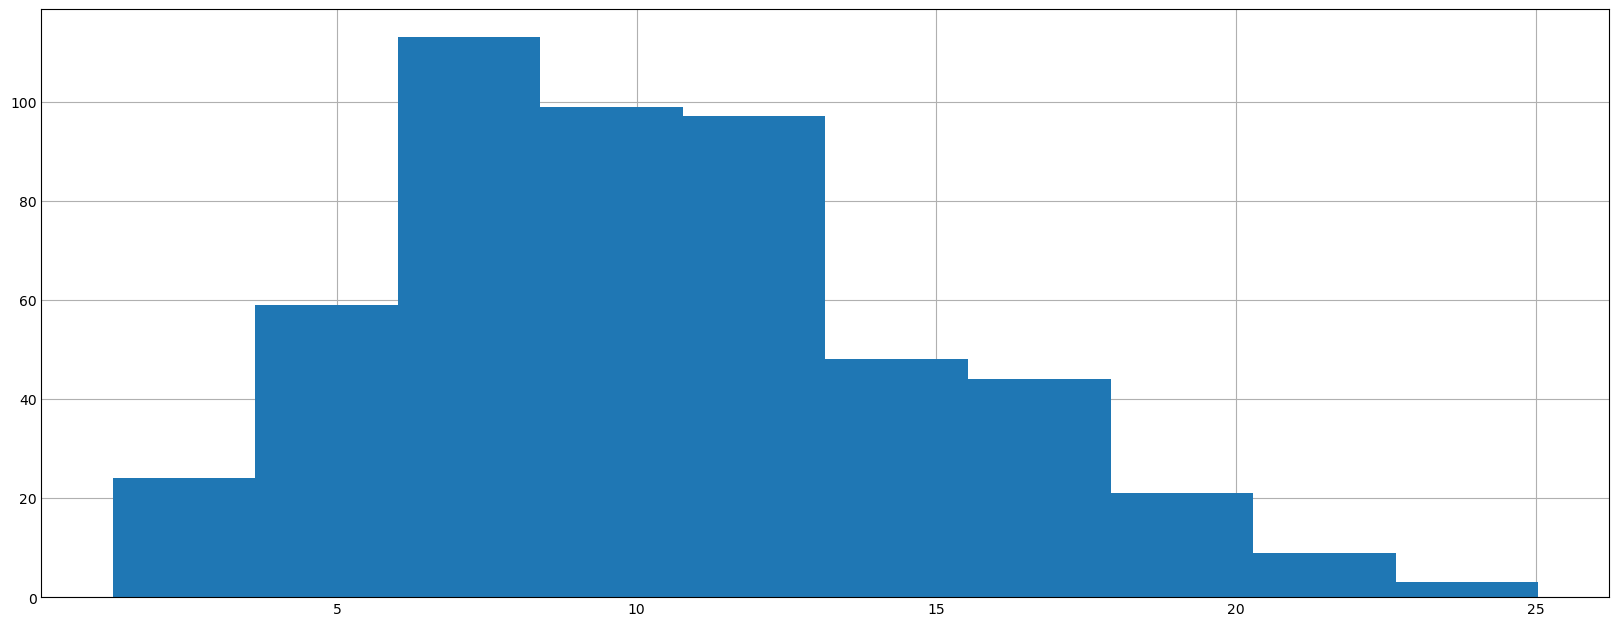

In [84]:
# detecting and solving missing values

plt.figure(figsize=(16,6))
miss_val = df[df['Precip Type'].isna()]
plt.hist(miss_val['Temperature (C)'], color='#1f77b4')
plt.show()

In [33]:
df[df['Temperature (C)'] >= 0]['Precip Type'].value_counts()

Precip Type
rain    85200
snow      325
Name: count, dtype: int64

The "Precip Type" column contains missing values. Given that precipitation type is predominantly rain when temperatures are above zero, we can impute these missing values with 'rain'.

In [34]:
df2 = df.copy()
df2.fillna('rain', inplace=True)

In [35]:
# verifing
df2.isna().sum()

Formatted Date          0
Summary                 0
Precip Type             0
Temperature (C)         0
Wind Speed (km/h)       0
Pressure (millibars)    0
Humidity                0
dtype: int64

In [36]:
# converting formatted date type to datetime
df2[['date', 'time']] = df2['Formatted Date'].str.split(' ', n=1, expand=True)
df3 = df2.drop('Formatted Date', axis=1)
df3

Summary Precip Type  Temperature (C)  Wind Speed (km/h)  \
0      Partly Cloudy        rain         9.472222            14.1197   
1      Partly Cloudy        rain         9.355556            14.2646   
2      Mostly Cloudy        rain         9.377778             3.9284   
3      Partly Cloudy        rain         8.288889            14.1036   
4      Mostly Cloudy        rain         8.755556            11.0446   
...              ...         ...              ...                ...   
96448  Partly Cloudy        rain        26.016667            10.9963   
96449  Partly Cloudy        rain        24.583333            10.0947   
96450  Partly Cloudy        rain        22.038889             8.9838   
96451  Partly Cloudy        rain        21.522222            10.5294   
96452  Partly Cloudy        rain        20.438889             5.8765   

       Pressure (millibars)  Humidity        date                time  
0                   1015.13      0.89  2006-04-01  00:00:00.000 +0200  
1                   1015.63      0.86  2006-04-01  01:00:00.000 +0200  
2                   1015.94      0.89  2006-04-01  02:00:00.000 +0200  
3                   1016.41      0.83  2006-04-01  03:00:00.000 +0200  
4                   1016.51      0.83  2006-04-01  04:00:00.000 +0200  
...                     ...       ...         ...                 ...  
96448               1014.36      0.43  2016-09-09  19:00:00.000 +0200  
96449               1015.16      0.48  2016-09-09  20:00:00.000 +0200  
96450               1015.66      0.56  2016-09-09  21:00:00.000 +0200  
96451               1015.95      0.60  2016-09-09  22:00:00.000 +0200  
96452               1016.16      0.61  2016-09-09  23:00:00.000 +0200  

[96429 rows x 8 columns]

In [37]:
df3["date"] = pd.to_datetime(df3["date"], format='%Y-%m-%d')
df3['year'] = df3['date'].dt.year
df3["month"] = df3["date"].dt.month
df3['day'] = df3['date'].dt.day
df3['hour'] = df3['date'].dt.hour
df3.head()

Summary Precip Type  Temperature (C)  Wind Speed (km/h)  \
0  Partly Cloudy        rain         9.472222            14.1197   
1  Partly Cloudy        rain         9.355556            14.2646   
2  Mostly Cloudy        rain         9.377778             3.9284   
3  Partly Cloudy        rain         8.288889            14.1036   
4  Mostly Cloudy        rain         8.755556            11.0446   

   Pressure (millibars)  Humidity       date                time  year  month  \
0               1015.13      0.89 2006-04-01  00:00:00.000 +0200  2006      4   
1               1015.63      0.86 2006-04-01  01:00:00.000 +0200  2006      4   
2               1015.94      0.89 2006-04-01  02:00:00.000 +0200  2006      4   
3               1016.41      0.83 2006-04-01  03:00:00.000 +0200  2006      4   
4               1016.51      0.83 2006-04-01  04:00:00.000 +0200  2006      4   

   day  hour  
0    1     0  
1    1     0  
2    1     0  
3    1     0  
4    1     0

In [38]:
# standardize
df3['Humidity'] = df3['Humidity']*100 # convert Humidity to percent
df3 = df3.sort_values('date') # sort values by Formatted Date
df3 = df3.reset_index(drop=True)
df3

Summary Precip Type  Temperature (C)  Wind Speed (km/h)  \
0           Overcast        rain         5.472222            22.7171   
1           Overcast        rain         5.422222            19.5615   
2           Overcast        rain         4.933333            23.9407   
3           Overcast        rain         5.972222            24.2305   
4           Overcast        rain         5.472222            25.4058   
...              ...         ...              ...                ...   
96424  Mostly Cloudy        snow        -1.488889             8.8711   
96425  Mostly Cloudy        snow        -1.161111             8.9999   
96426  Mostly Cloudy        snow        -0.872222             9.1126   
96427  Mostly Cloudy        rain         2.622222            13.9909   
96428  Mostly Cloudy        snow        -1.655556            10.2718   

       Pressure (millibars)  Humidity       date                time  year  \
0                   1009.51      87.0 2006-01-01  22:00:00.000 +0100  2006   
1                   1009.64      86.0 2006-01-01  23:00:00.000 +0100  2006   
2                   1009.43      86.0 2006-01-01  21:00:00.000 +0100  2006   
3                   1009.39      80.0 2006-01-01  20:00:00.000 +0100  2006   
4                   1009.55      83.0 2006-01-01  19:00:00.000 +0100  2006   
...                     ...       ...        ...                 ...   ...   
96424               1020.48      95.0 2016-12-31  02:00:00.000 +0100  2016   
96425               1020.59      95.0 2016-12-31  01:00:00.000 +0100  2016   
96426               1020.67      94.0 2016-12-31  00:00:00.000 +0100  2016   
96427               1020.32      83.0 2016-12-31  13:00:00.000 +0100  2016   
96428               1020.75      91.0 2016-12-31  07:00:00.000 +0100  2016   

       month  day  hour  
0          1    1     0  
1          1    1     0  
2          1    1     0  
3          1    1     0  
4          1    1     0  
...      ...  ...   ...  
96424     12   31     0  
96425     12   31     0  
96426     12   31     0  
96427     12   31     0  
96428     12   31     0  

[96429 rows x 12 columns]

In [39]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
df3['season'] = df3['month'].apply(get_season)

In [40]:
def split_time(hour):
    if 0 <= hour <= 11:
        return "Morning"
    elif 12 <= hour <= 24:
        return "Evening"
    else:
        return "nan"
df3['M/E'] = df3['hour'].apply(split_time)
df3

Summary Precip Type  Temperature (C)  Wind Speed (km/h)  \
0           Overcast        rain         5.472222            22.7171   
1           Overcast        rain         5.422222            19.5615   
2           Overcast        rain         4.933333            23.9407   
3           Overcast        rain         5.972222            24.2305   
4           Overcast        rain         5.472222            25.4058   
...              ...         ...              ...                ...   
96424  Mostly Cloudy        snow        -1.488889             8.8711   
96425  Mostly Cloudy        snow        -1.161111             8.9999   
96426  Mostly Cloudy        snow        -0.872222             9.1126   
96427  Mostly Cloudy        rain         2.622222            13.9909   
96428  Mostly Cloudy        snow        -1.655556            10.2718   

       Pressure (millibars)  Humidity       date                time  year  \
0                   1009.51      87.0 2006-01-01  22:00:00.000 +0100  2006   
1                   1009.64      86.0 2006-01-01  23:00:00.000 +0100  2006   
2                   1009.43      86.0 2006-01-01  21:00:00.000 +0100  2006   
3                   1009.39      80.0 2006-01-01  20:00:00.000 +0100  2006   
4                   1009.55      83.0 2006-01-01  19:00:00.000 +0100  2006   
...                     ...       ...        ...                 ...   ...   
96424               1020.48      95.0 2016-12-31  02:00:00.000 +0100  2016   
96425               1020.59      95.0 2016-12-31  01:00:00.000 +0100  2016   
96426               1020.67      94.0 2016-12-31  00:00:00.000 +0100  2016   
96427               1020.32      83.0 2016-12-31  13:00:00.000 +0100  2016   
96428               1020.75      91.0 2016-12-31  07:00:00.000 +0100  2016   

       month  day  hour  season      M/E  
0          1    1     0  Winter  Morning  
1          1    1     0  Winter  Morning  
2          1    1     0  Winter  Morning  
3          1    1     0  Winter  Morning  
4          1    1     0  Winter  Morning  
...      ...  ...   ...     ...      ...  
96424     12   31     0  Winter  Morning  
96425     12   31     0  Winter  Morning  
96426     12   31     0  Winter  Morning  
96427     12   31     0  Winter  Morning  
96428     12   31     0  Winter  Morning  

[96429 rows x 14 columns]

In [41]:
df3.sort_values(by=['year', 'month', 'day', 'hour'], inplace=True)
df3

Summary Precip Type  Temperature (C)  Wind Speed (km/h)  \
0           Overcast        rain         5.472222            22.7171   
1           Overcast        rain         5.422222            19.5615   
2           Overcast        rain         4.933333            23.9407   
3           Overcast        rain         5.972222            24.2305   
4           Overcast        rain         5.472222            25.4058   
...              ...         ...              ...                ...   
96424  Mostly Cloudy        snow        -1.488889             8.8711   
96425  Mostly Cloudy        snow        -1.161111             8.9999   
96426  Mostly Cloudy        snow        -0.872222             9.1126   
96427  Mostly Cloudy        rain         2.622222            13.9909   
96428  Mostly Cloudy        snow        -1.655556            10.2718   

       Pressure (millibars)  Humidity       date                time  year  \
0                   1009.51      87.0 2006-01-01  22:00:00.000 +0100  2006   
1                   1009.64      86.0 2006-01-01  23:00:00.000 +0100  2006   
2                   1009.43      86.0 2006-01-01  21:00:00.000 +0100  2006   
3                   1009.39      80.0 2006-01-01  20:00:00.000 +0100  2006   
4                   1009.55      83.0 2006-01-01  19:00:00.000 +0100  2006   
...                     ...       ...        ...                 ...   ...   
96424               1020.48      95.0 2016-12-31  02:00:00.000 +0100  2016   
96425               1020.59      95.0 2016-12-31  01:00:00.000 +0100  2016   
96426               1020.67      94.0 2016-12-31  00:00:00.000 +0100  2016   
96427               1020.32      83.0 2016-12-31  13:00:00.000 +0100  2016   
96428               1020.75      91.0 2016-12-31  07:00:00.000 +0100  2016   

       month  day  hour  season      M/E  
0          1    1     0  Winter  Morning  
1          1    1     0  Winter  Morning  
2          1    1     0  Winter  Morning  
3          1    1     0  Winter  Morning  
4          1    1     0  Winter  Morning  
...      ...  ...   ...     ...      ...  
96424     12   31     0  Winter  Morning  
96425     12   31     0  Winter  Morning  
96426     12   31     0  Winter  Morning  
96427     12   31     0  Winter  Morning  
96428     12   31     0  Winter  Morning  

[96429 rows x 14 columns]

In [42]:
cols = df3.columns.to_list()
cols = cols[-2:] + cols[:-2]
df3 = df3[cols]
df3.dtypes

season                          object
M/E                             object
Summary                         object
Precip Type                     object
Temperature (C)                float64
Wind Speed (km/h)              float64
Pressure (millibars)           float64
Humidity                       float64
date                    datetime64[ns]
time                            object
year                             int32
month                            int32
day                              int32
hour                             int32
dtype: object

In [43]:
df3.describe().T.style.background_gradient(cmap='YlOrBr', axis=1)

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96429 entries, 0 to 96428
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   season                96429 non-null  object        
 1   M/E                   96429 non-null  object        
 2   Summary               96429 non-null  object        
 3   Precip Type           96429 non-null  object        
 4   Temperature (C)       96429 non-null  float64       
 5   Wind Speed (km/h)     96429 non-null  float64       
 6   Pressure (millibars)  96429 non-null  float64       
 7   Humidity              96429 non-null  float64       
 8   date                  96429 non-null  datetime64[ns]
 9   time                  96429 non-null  object        
 10  year                  96429 non-null  int32         
 11  month                 96429 non-null  int32         
 12  day                   96429 non-null  int32         
 13  hour            

In [45]:
df4=pd.DataFrame(df3,columns=["Summary","Precip Type","season"])
df4

Summary Precip Type  season
0           Overcast        rain  Winter
1           Overcast        rain  Winter
2           Overcast        rain  Winter
3           Overcast        rain  Winter
4           Overcast        rain  Winter
...              ...         ...     ...
96424  Mostly Cloudy        snow  Winter
96425  Mostly Cloudy        snow  Winter
96426  Mostly Cloudy        snow  Winter
96427  Mostly Cloudy        rain  Winter
96428  Mostly Cloudy        snow  Winter

[96429 rows x 3 columns]

In [46]:
df4.describe()

Summary Precip Type  season
count           96429       96429   96429
unique             27           2       4
top     Partly Cloudy        rain  Summer
freq            31726       85717   24285

In [47]:
from IPython.core.display import HTML
def multi_table(table_list):
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [48]:
print("Percentages of each unique value of categorical features:")
nunique = {var: pd.DataFrame((df3[var].value_counts()/len(df3[var])*100).map('{:.3f}%'.format)) 
              for var in {'season', 'M/E', 'Summary', 'Precip Type'}}
multi_table([nunique['season'],nunique['M/E'],nunique['Summary'],nunique['Precip Type']])

Percentages of each unique value of categorical features:


Visualization

In [52]:
#Profile Report
profile = ProfileReport(df3,
                        minimal=True,
                        progress_bar=False,
                        explorative=True,
                        dark_mode=True,
                        html={'style': {'primary_color': '#483104'}})

profile.to_notebook_iframe()



Season Column:
Winter data density is lower compared to other seasons.

Time of Recording:
All data were recorded in the morning.

Summary Column:
Cloudy weather has the highest density in the summary column.

Rain vs Snow:
Rain data density is higher than snow data.

Histograms Insight:

Histograms show data distributions for weather type, temperature, wind speed, day, and air humidity.

Data count in histograms helps identify anomalies and improve forecasting models.
Histograms indicate:
Temperature follows a bell-shaped curve (normal distribution).
Wind speed shows positive skewness (higher values skewed).
Air pressure has a needle distribution (sharp peak).
Humidity exhibits negative skewness (lower values skewed).
Distribution Explanation:

Needle distributions in air pressure reflect localized and temporary changes.
Negative skewness in humidity suggests clustering towards higher humidity.
Positive skewness in wind speed indicates accumulation towards higher speeds.
Normal distribution in temperature shows even distribution around a central value, common in seasonal variations.

In [56]:
import plotly.express as px
df5=pd.DataFrame(df3,columns=["year","month","day","Temperature (C)","Wind Speed (km/h)","Pressure (millibars)","Humidity"])
z = df5.corr()
fig = px.imshow(z, text_auto=True,aspect="auto", color_continuous_scale='Blues')
fig.show()

The correlations between attributes are generally absent or very low, with humidity and temperature showing the strongest correlation.

Specifically, as temperature increases, humidity tends to decrease.
            


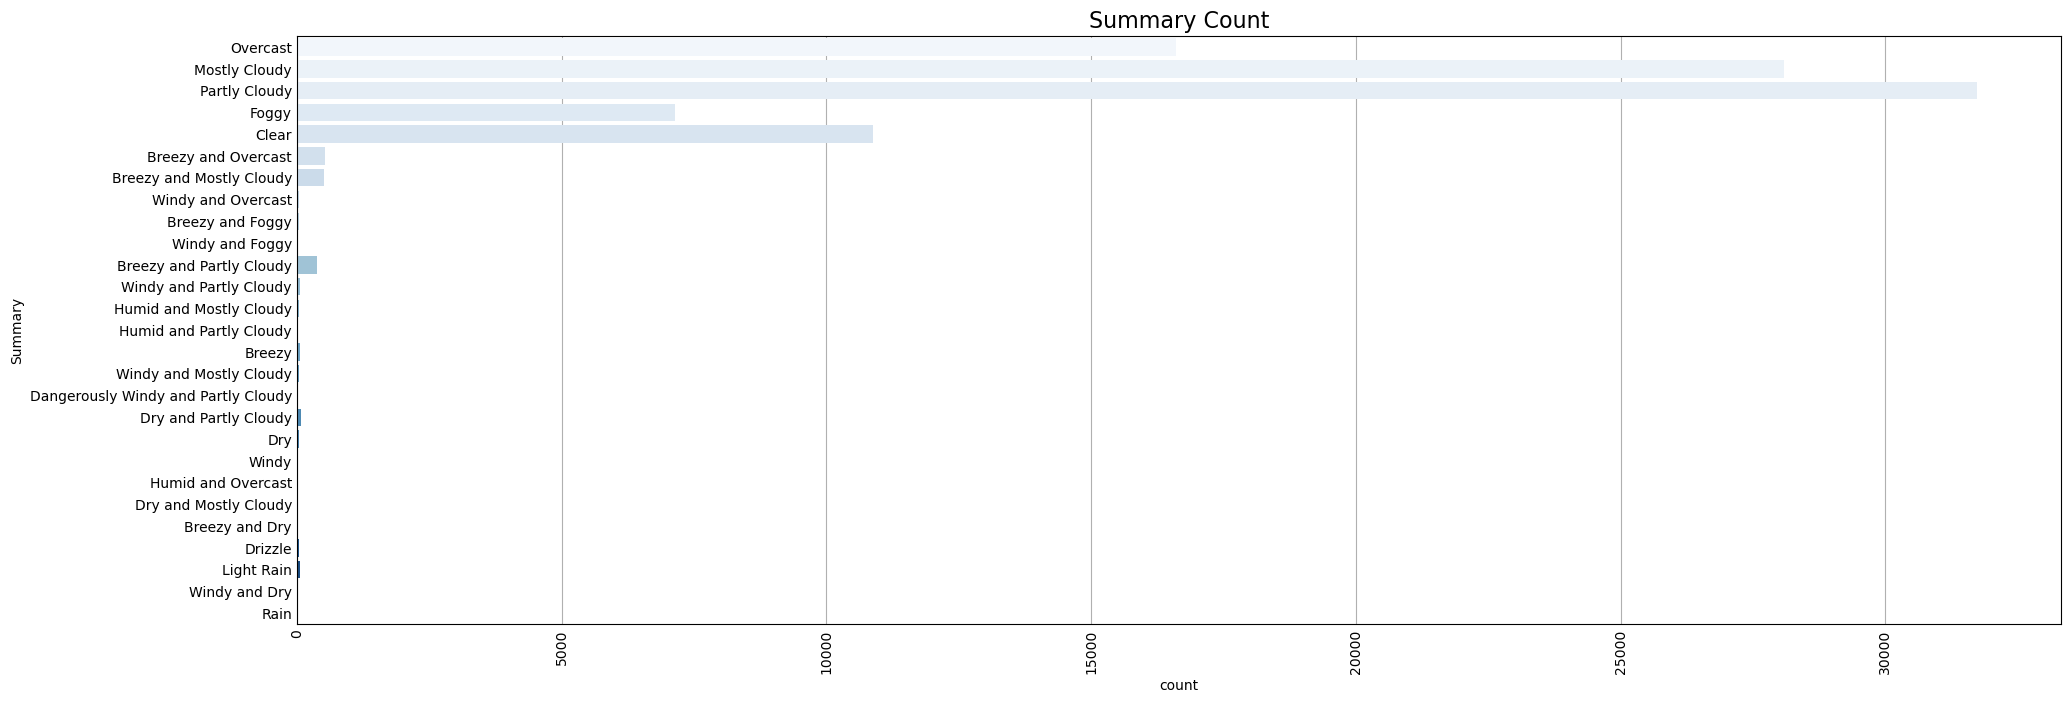

In [57]:
fig , ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(y='Summary', data=df4, palette="Blues")
plt.xticks(rotation = 90)
plt.title('Summary Count', fontsize=16)
plt.show()

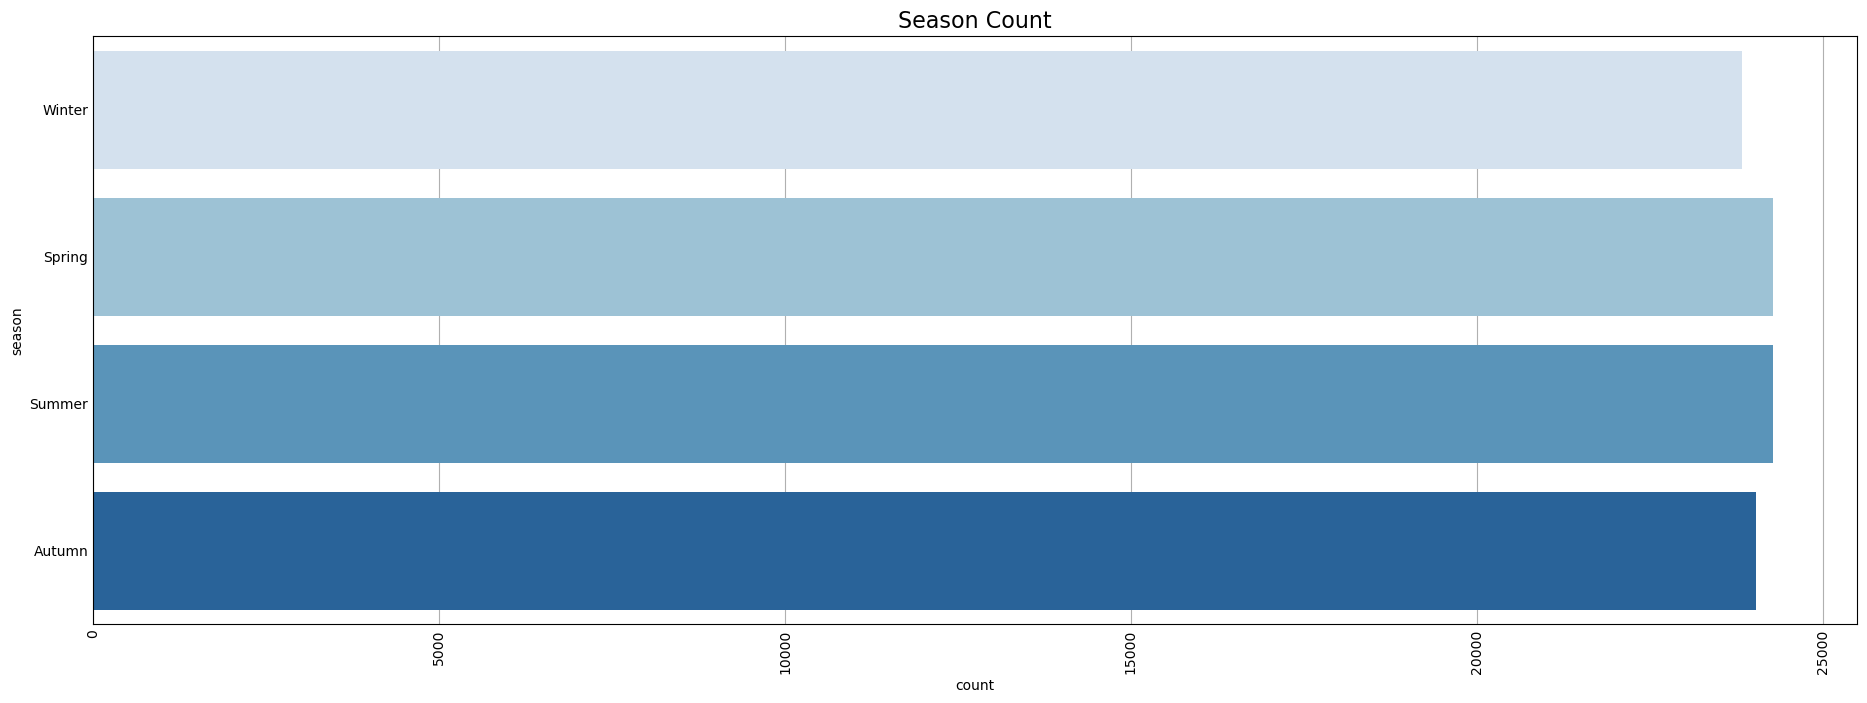

In [58]:
fig , ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(y=df4['season'], data=df4, palette="Blues")
plt.xticks(rotation = 90)
plt.title('Season Count', fontsize=16)
plt.show()

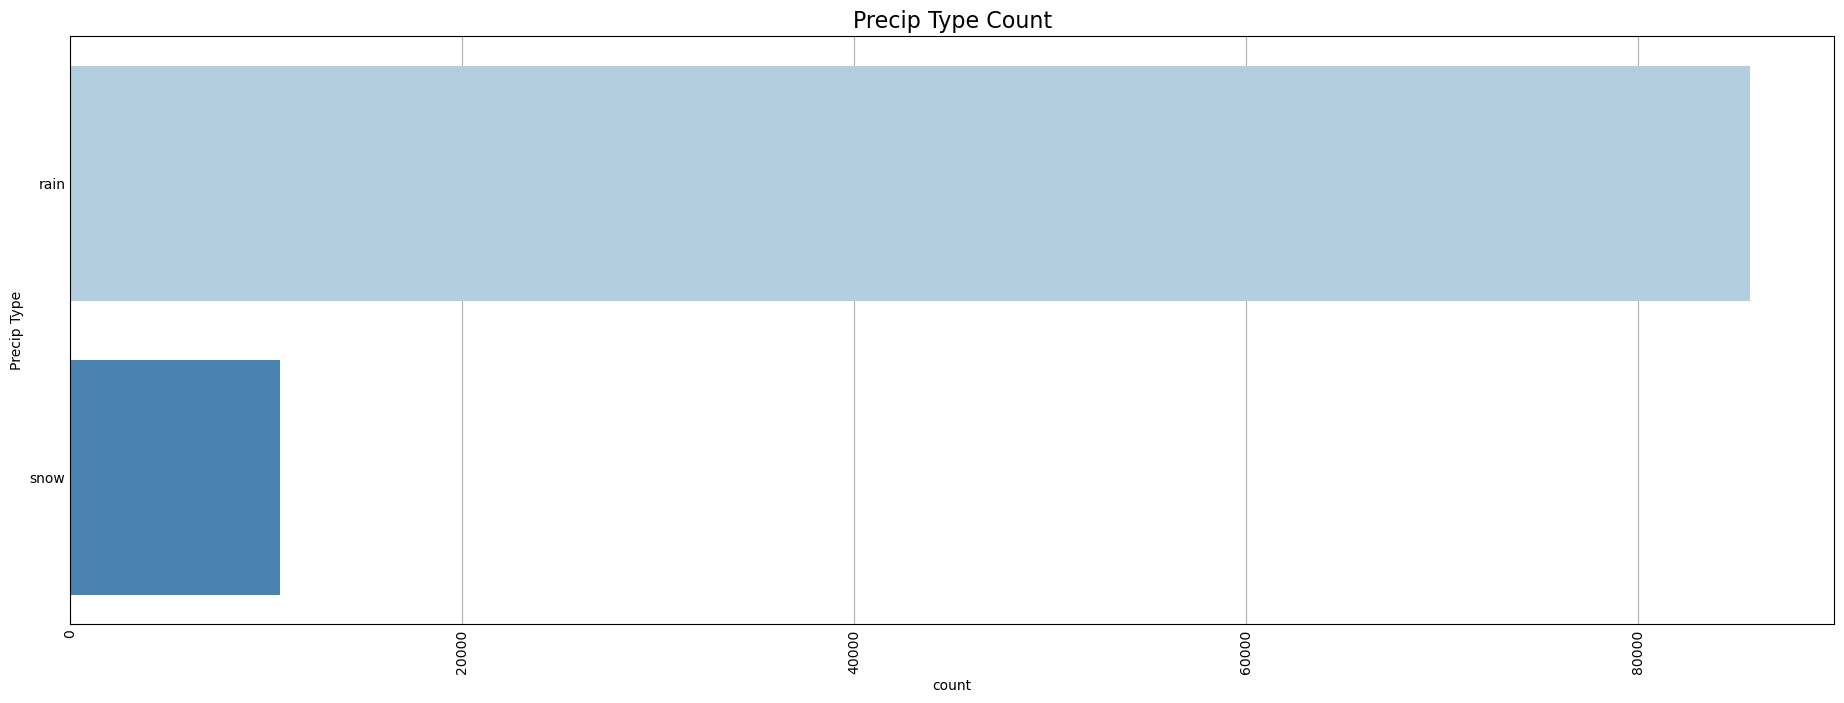

In [59]:
fig , ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(y=df3['Precip Type'], data=df3, palette="Blues")
plt.xticks(rotation = 90)
plt.title('Precip Type Count', fontsize=16)
plt.show()

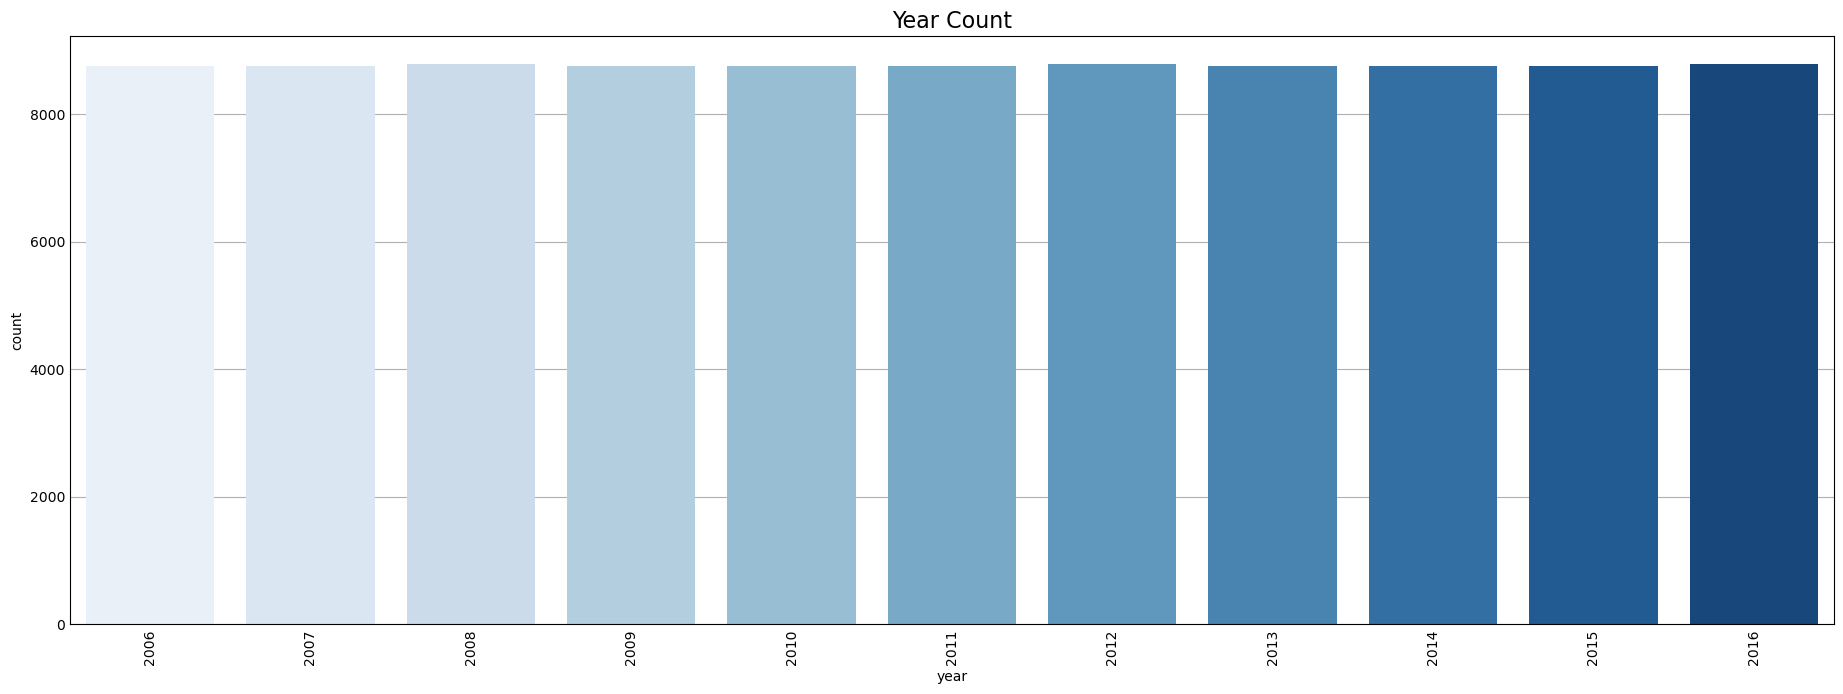

In [60]:
fig , ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x=df3['year'], data=df3, palette="Blues")
plt.xticks(rotation = 90)
plt.title('Year Count', fontsize=16)
plt.show()

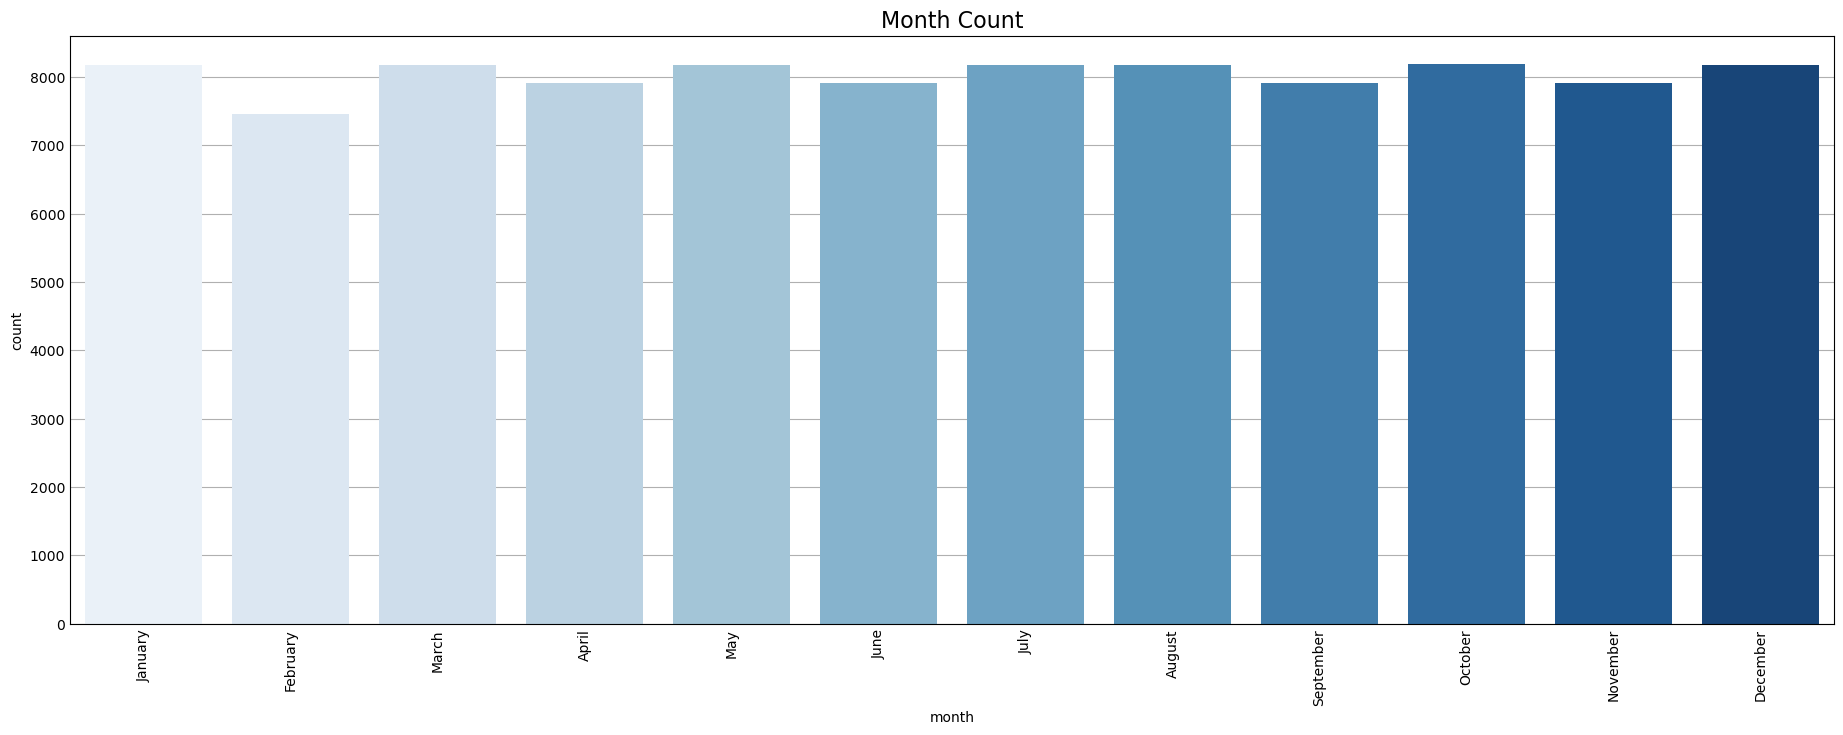

In [61]:
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig , ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x=df3['month'], data=df3, palette="Blues")
plt.xticks(ticks=np.arange(12), labels=month_names, rotation = 90)
plt.title('Month Count', fontsize=16)
plt.show()

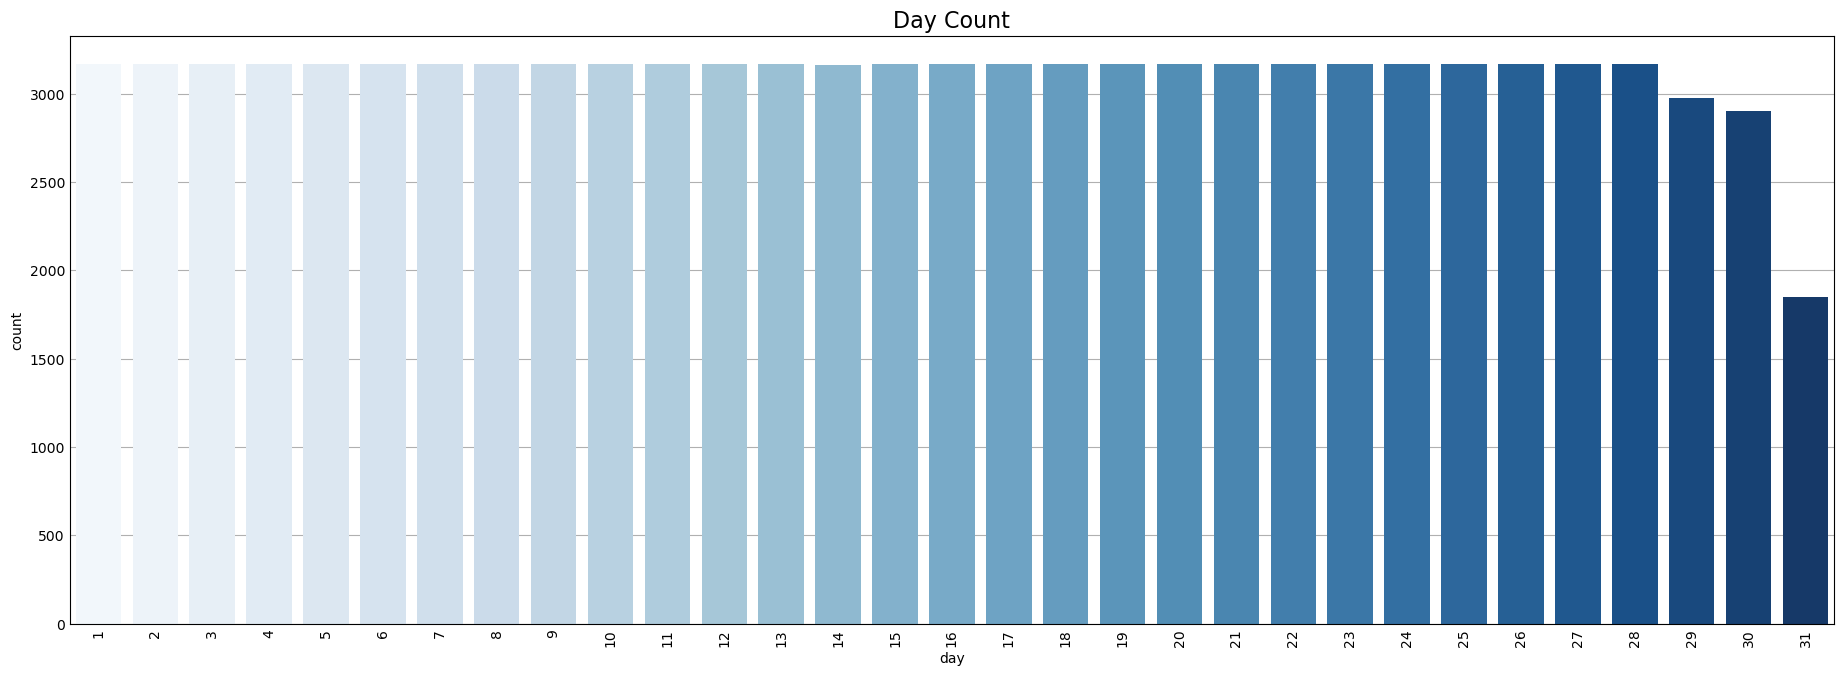

In [62]:
fig , ax = plt.subplots(figsize=(18,6))
ax = sns.countplot(x=df3['day'], data=df3, palette="Blues")
plt.xticks(rotation = 90)
plt.title('Day Count', fontsize=16)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



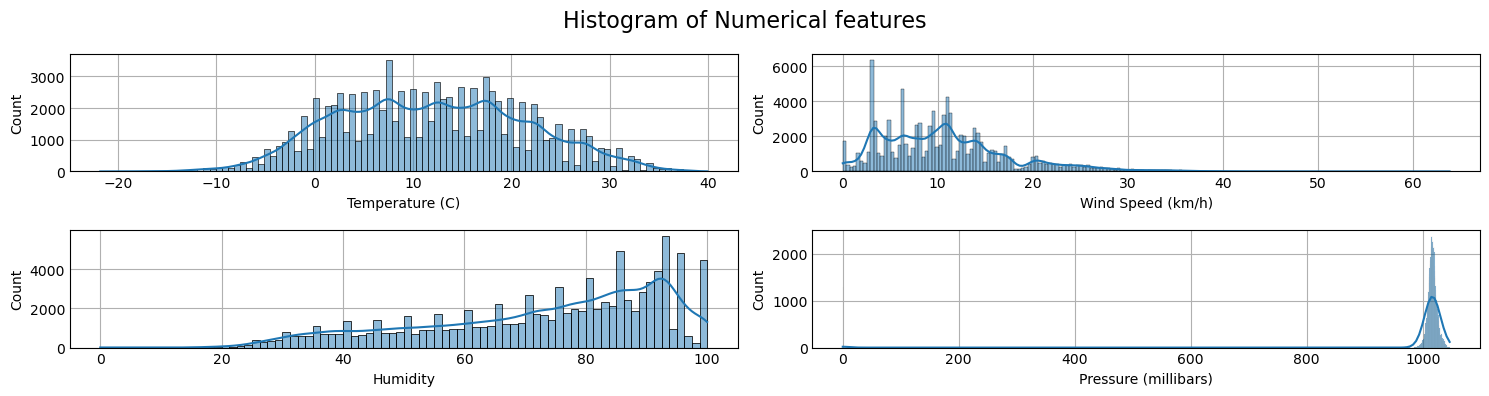

In [63]:
fig , axes = plt.subplots(figsize=(15,4) , nrows=2, ncols=2)
fig.suptitle('Histogram of Numerical features', fontsize=16)
i=0
j=0
columns = ['Temperature (C)', 'Wind Speed (km/h)', 'Humidity', 'Pressure (millibars)']
for col in columns:
    sns.histplot(ax=axes[i,j], data=df3, x=col, kde=True,color='#1f77b4')
    if j == 1:
        i += 1
        j = 0
    else:
        j += 1
plt.tight_layout()

<Axes: xlabel='Precip Type', ylabel='Summary'>

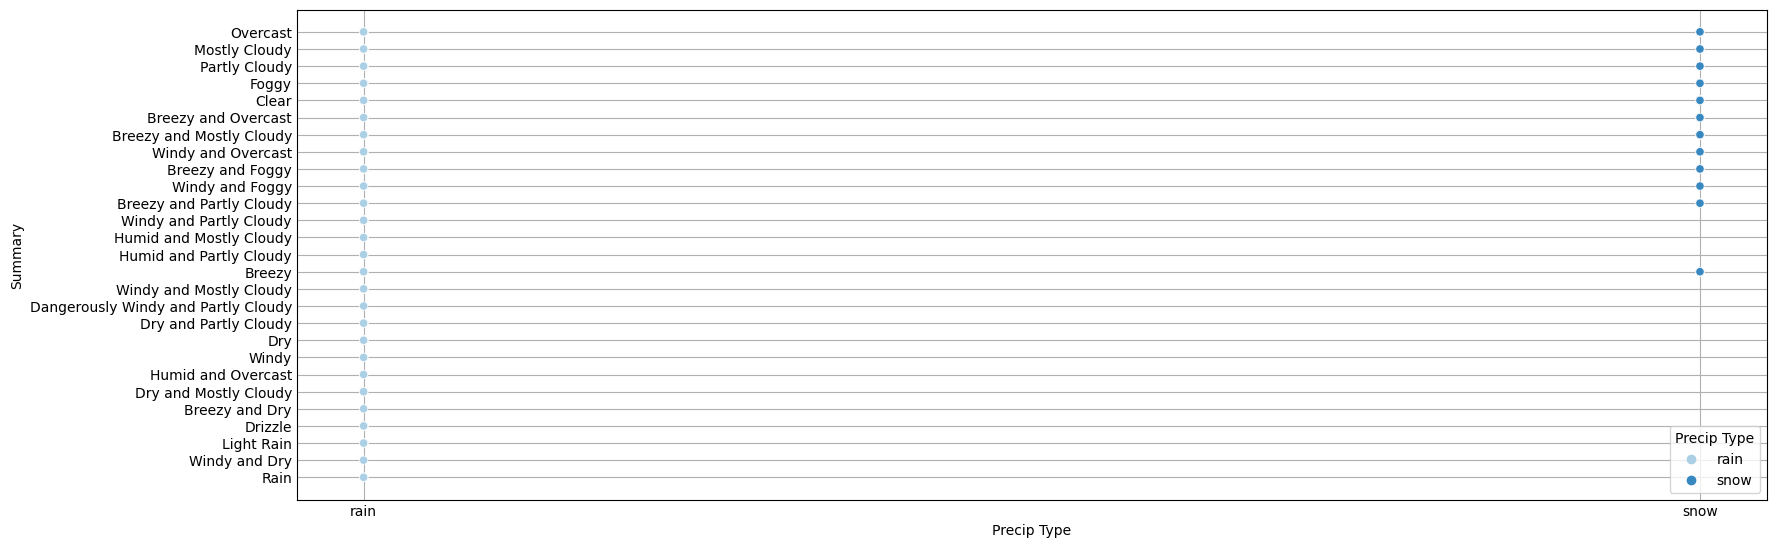

In [64]:
fig=plt.figure(figsize=(15,5))
sns.scatterplot(x='Precip Type',y='Summary',hue='Precip Type',data=df3,palette="Blues")

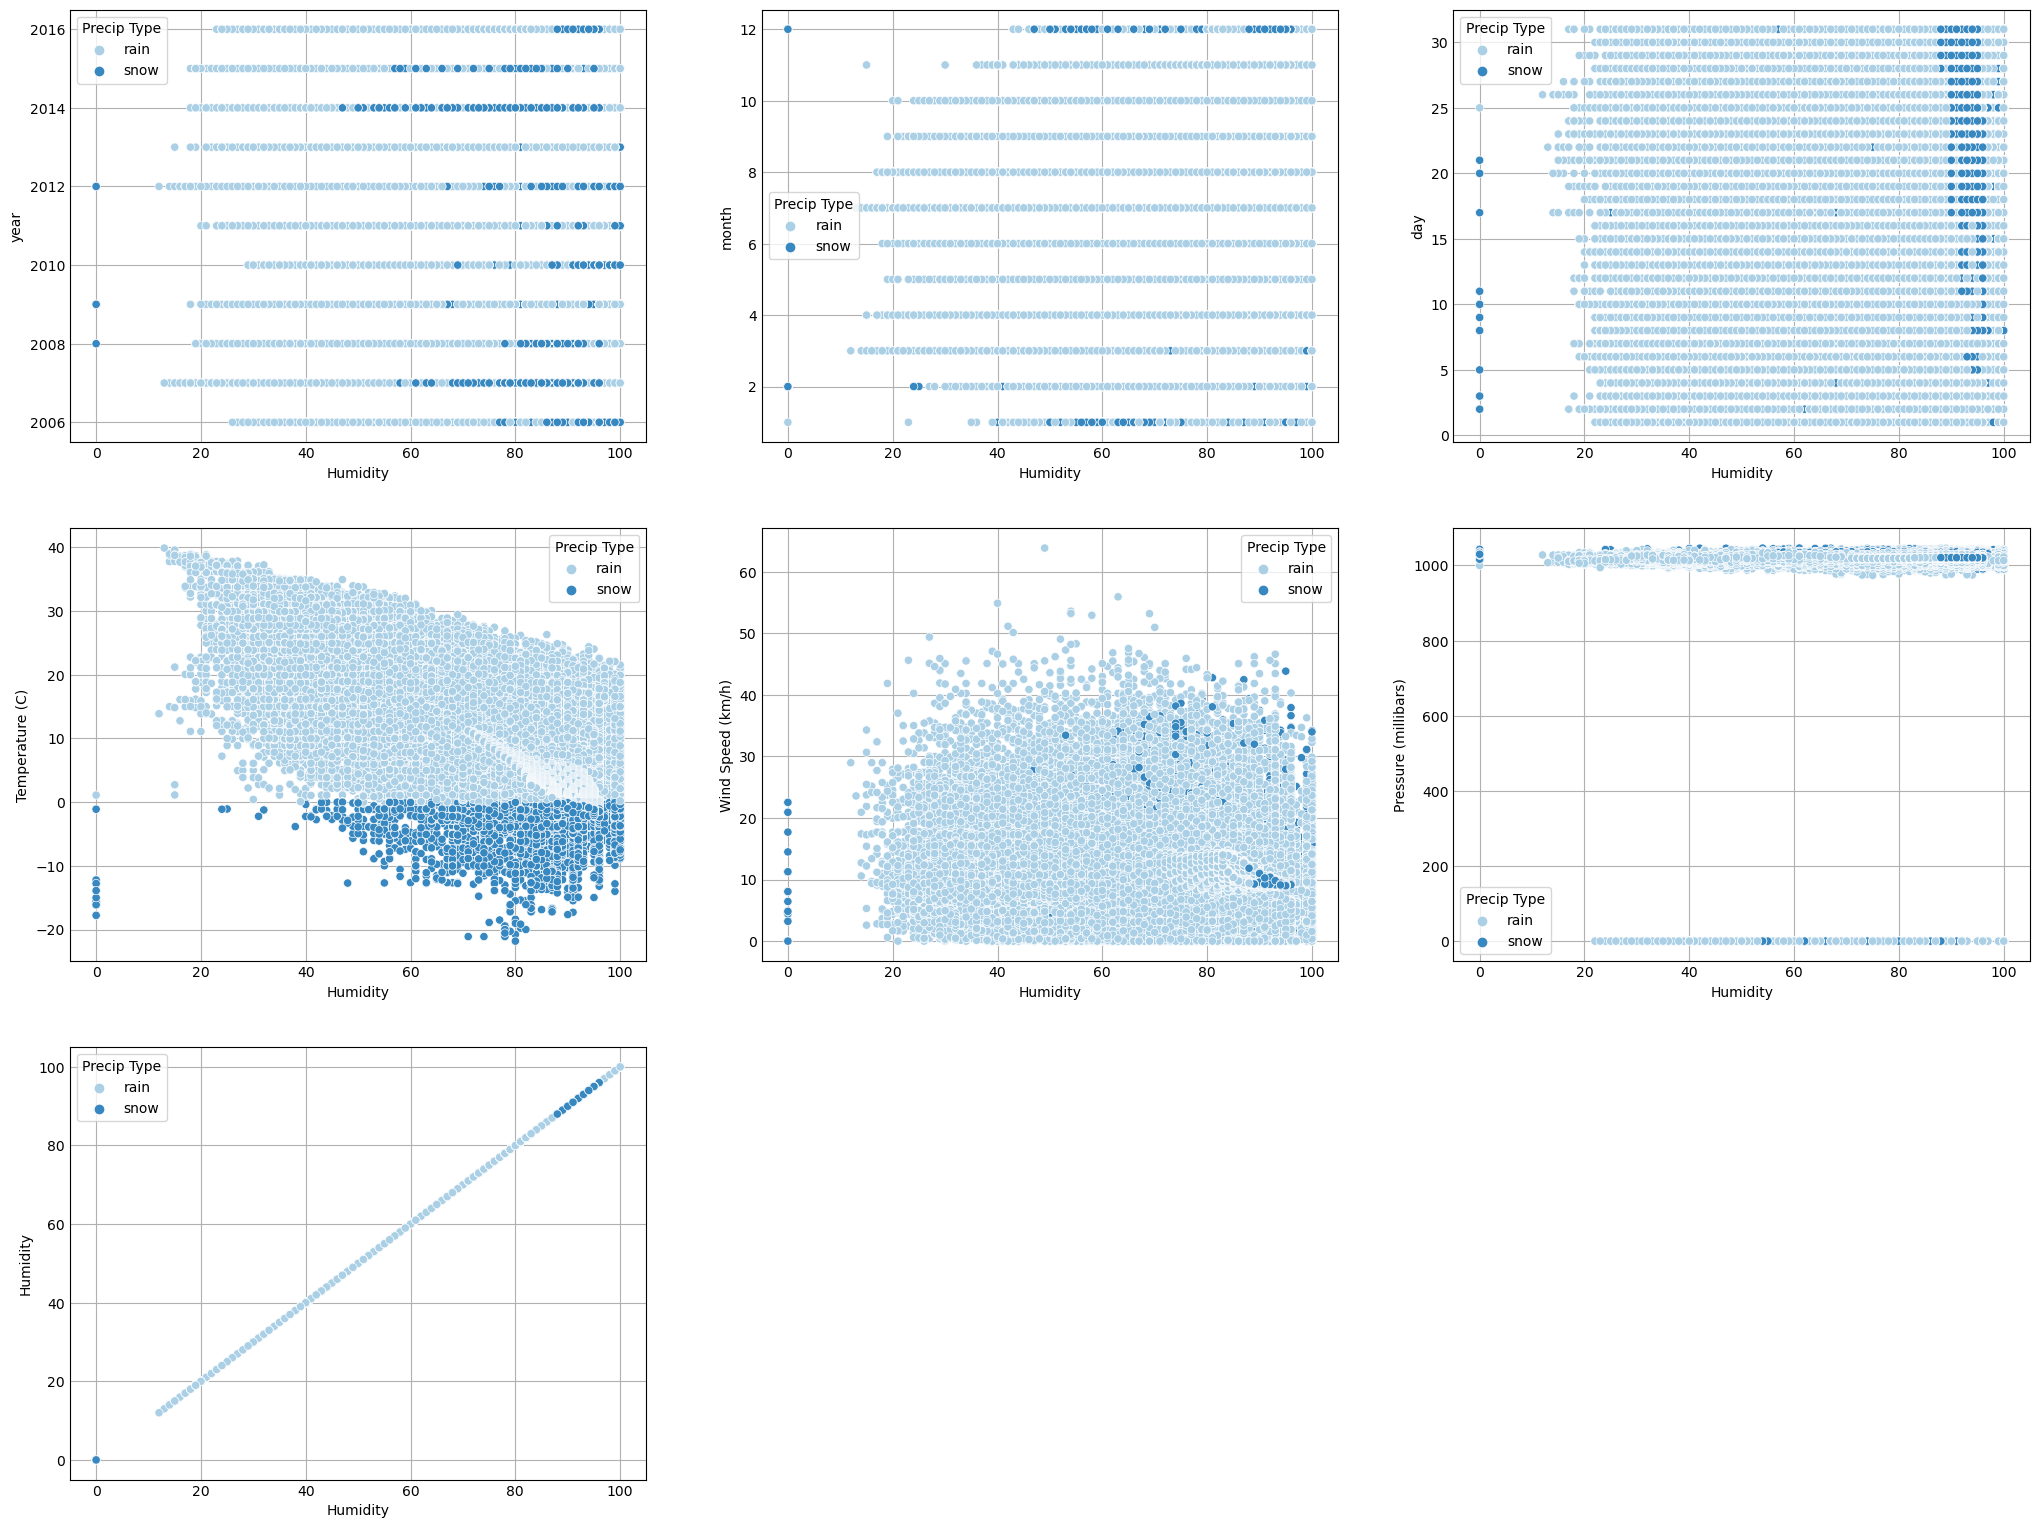

In [65]:
import matplotlib.pyplot as plt
ff = ["year","month","day","Temperature (C)","Wind Speed (km/h)","Pressure (millibars)","Humidity"]
fig=plt.figure(figsize=(20,15))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot(x='Humidity',y=col,hue='Precip Type',data=df3,palette="Blues")

Wind Speed and Humidity:

Moisture content ranges from 0.2 to 1 up to a wind speed of 30 km/h, with the highest density below this threshold. As wind speed increases beyond 40 km/h, moisture decreases significantly. This observation reflects how higher wind speeds correlate with lower air humidity, a common natural phenomenon. However, occasional instances of 0 humidity below 30 km/h suggest potential data errors that should be verified.

Temperature and Humidity:

Below zero degrees Celsius, particularly between -20°C to -10°C, humidity density is low but moisture content remains high, ranging from 0.6 to 1. As temperatures rise between 0°C to 25°C, minimum humidity decreases to 0.1, with peak density in this range varying from 0.1 to 1. At temperatures above 25°C, humidity density decreases as temperatures increase further. For instance, at 40°C, maximum humidity decreases to 0.15. This analysis clearly shows a decrease in humidity with rising temperatures.

Air Pressure and Humidity:

Air pressure density ranges from 990 to approximately 1050, with corresponding humidity varying from 0 to 1. At zero air pressure, minimum humidity is 0.2. To analyze pressure and humidity relationships more effectively, zero data points have been excluded. Overall, humidity density predominantly ranges from 0.1 to 1 between air pressures of 990 to 1045. For example, below 1000 air pressure, humidity varies between 0.23 and 1, while above 1045 air pressure, density decreases, and humidity ranges from 0.3 to 0.9.


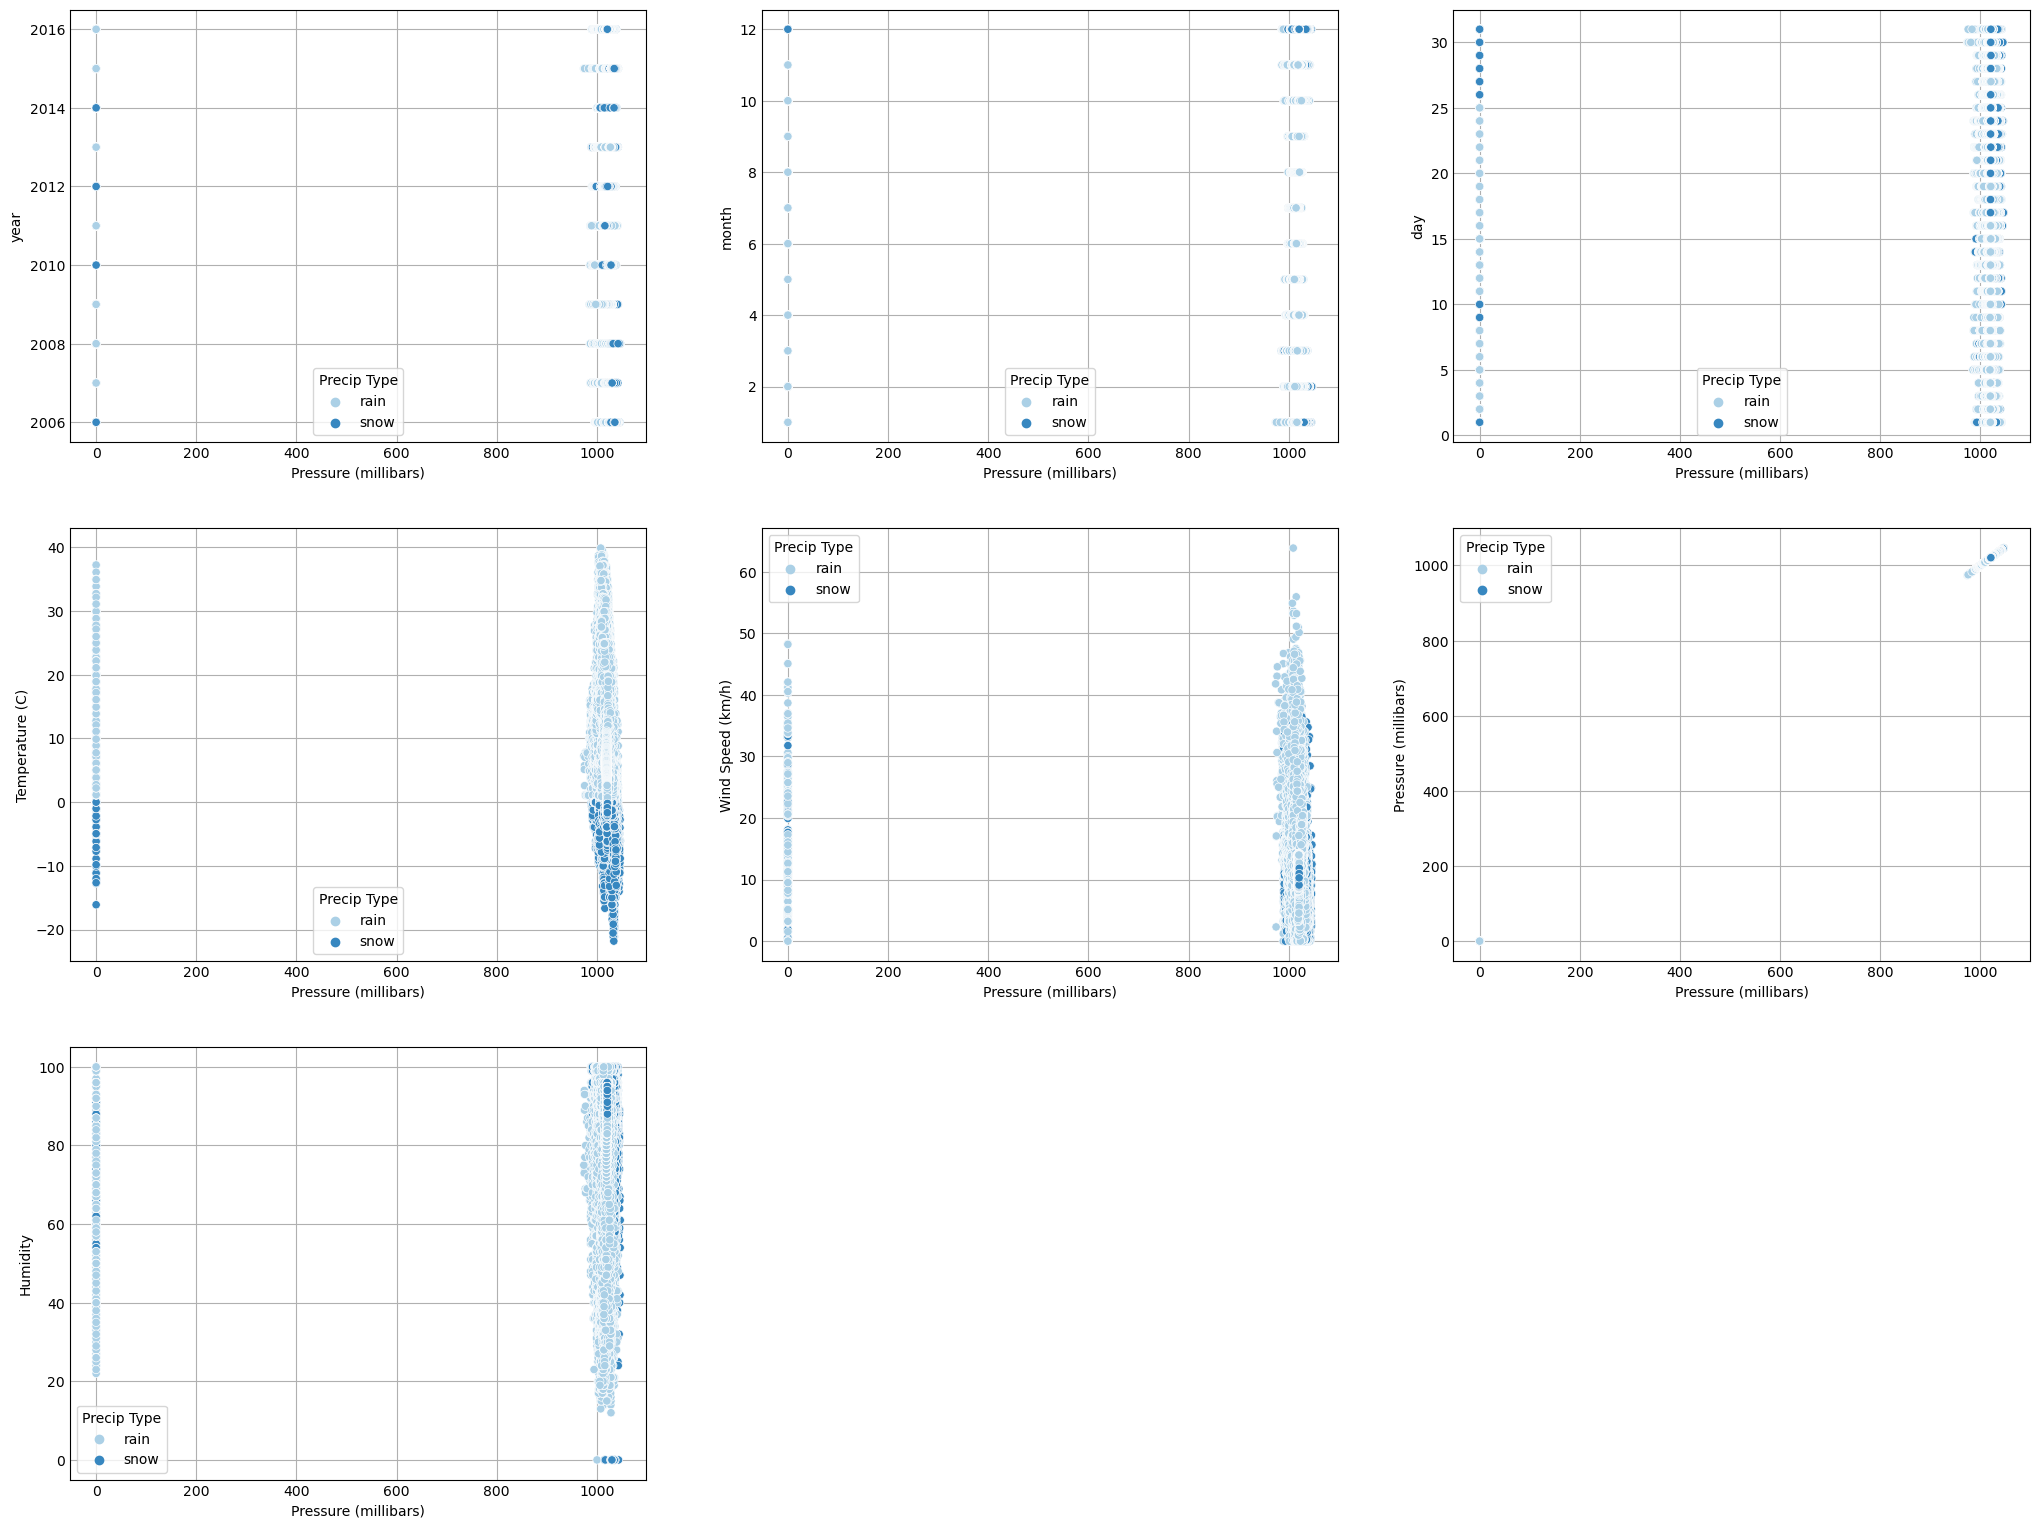

In [66]:
ff = ["year","month","day","Temperature (C)","Wind Speed (km/h)","Pressure (millibars)","Humidity"]
fig=plt.figure(figsize=(20,15))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot(x='Pressure (millibars)',y=col,hue='Precip Type',data=df3,palette="Blues")

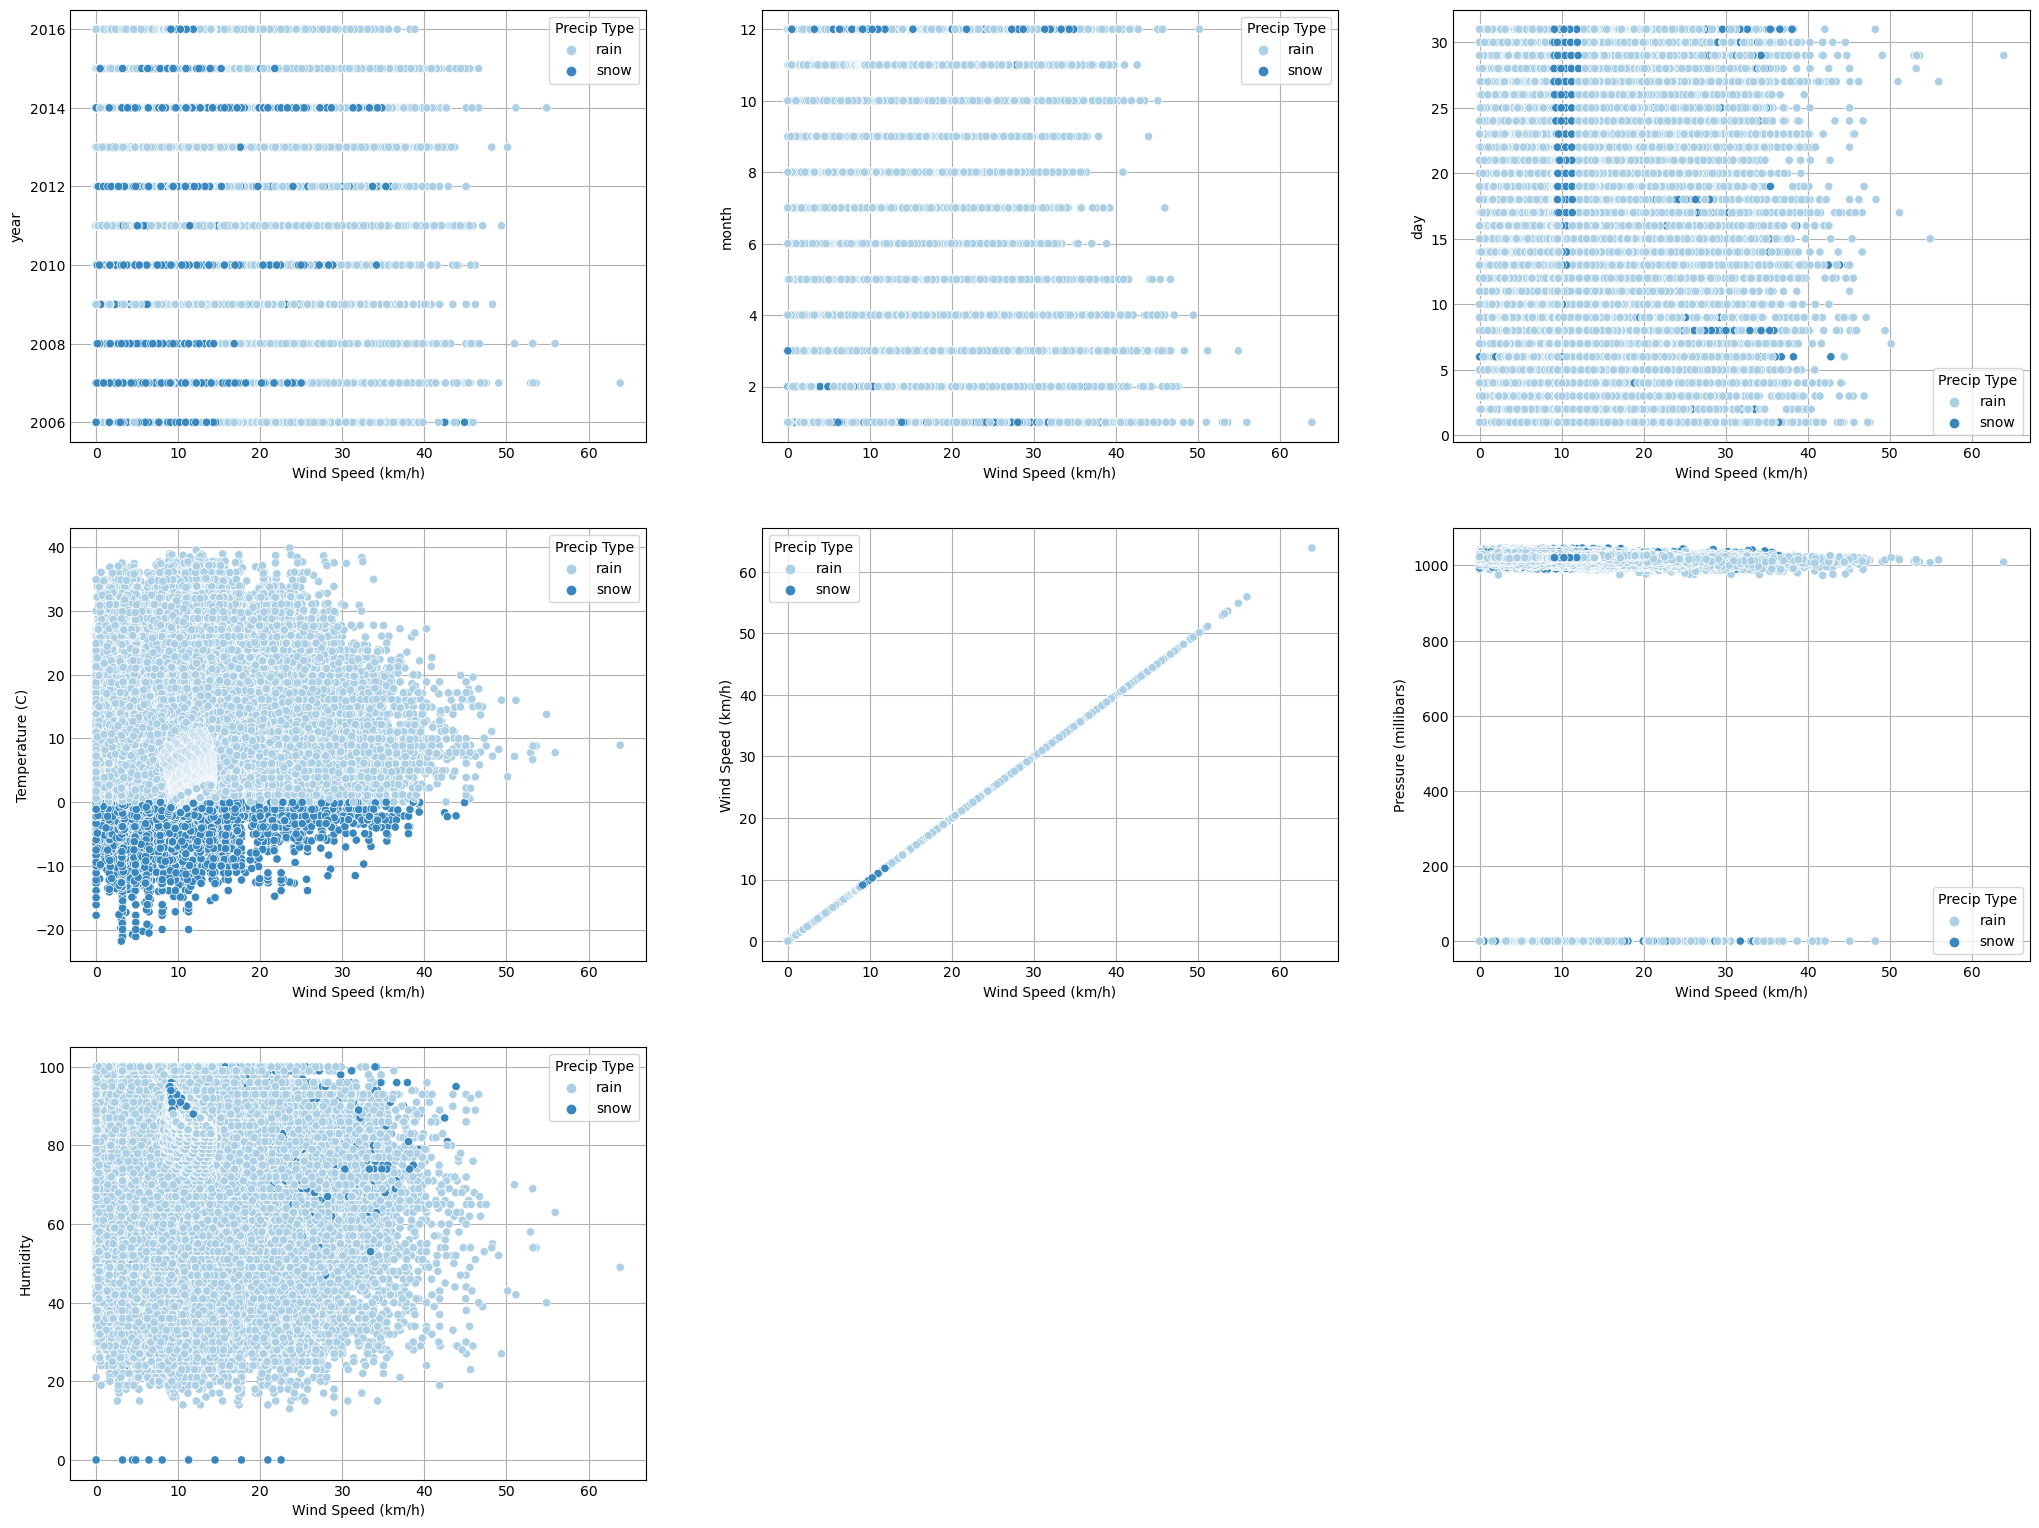

In [67]:
ff = ["year","month","day","Temperature (C)","Wind Speed (km/h)","Pressure (millibars)","Humidity"]
fig=plt.figure(figsize=(20,15))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot(x='Wind Speed (km/h)',y=col,hue='Precip Type',data=df3,palette="Blues")

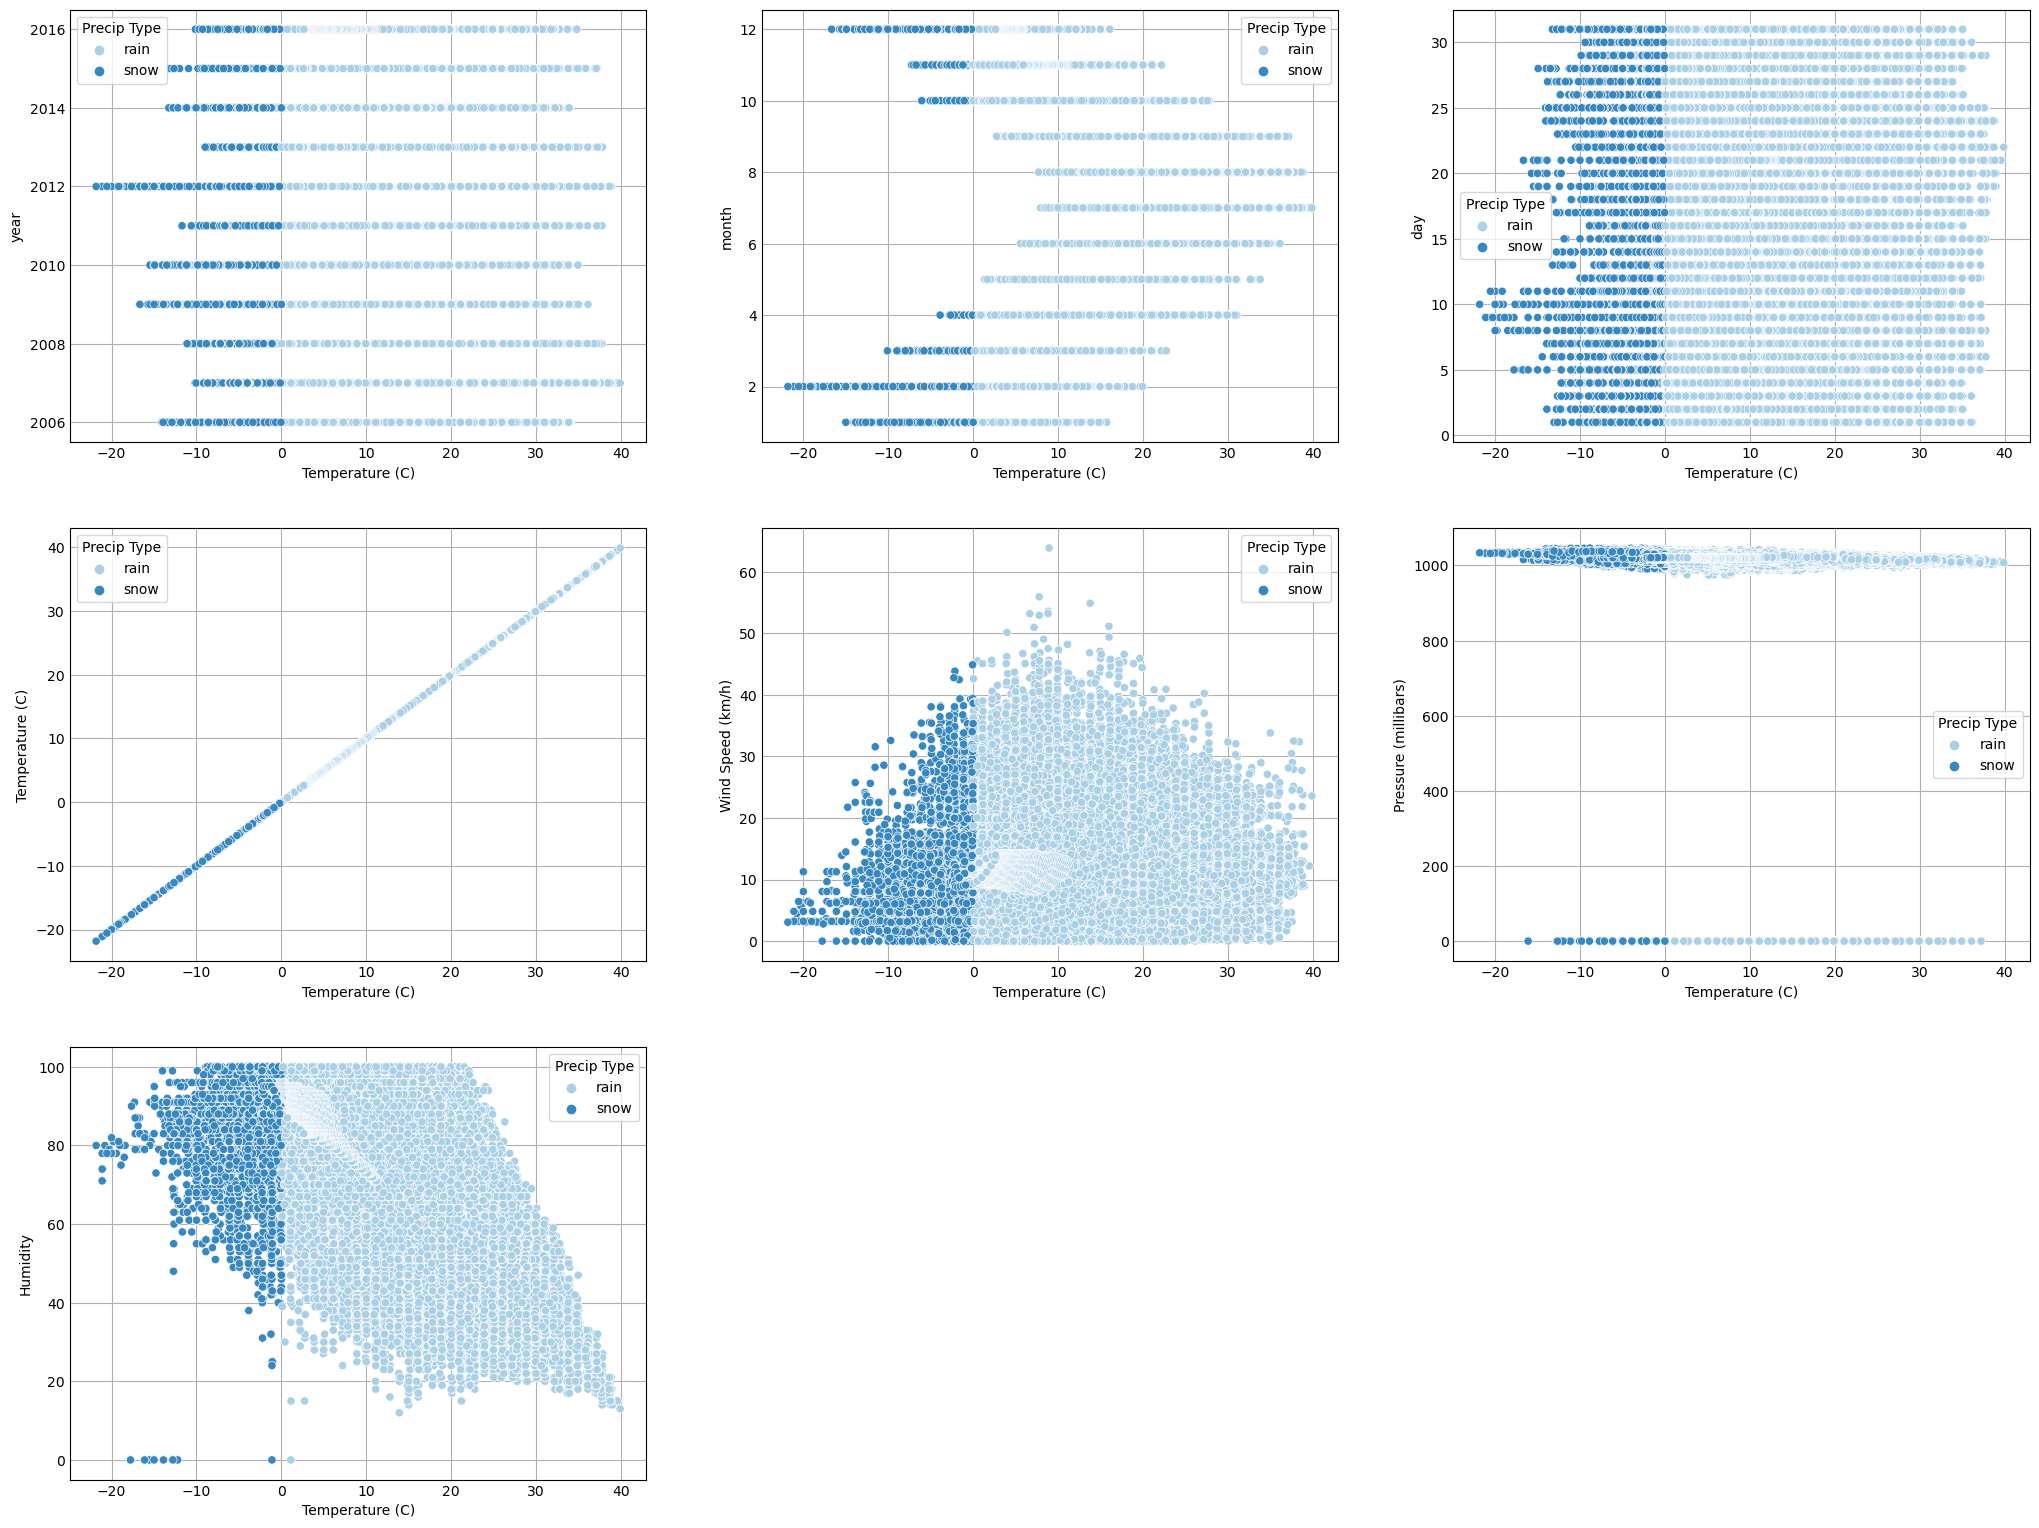

In [68]:
ff = ["year","month","day","Temperature (C)","Wind Speed (km/h)","Pressure (millibars)","Humidity"]
fig=plt.figure(figsize=(20,15))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot(x='Temperature (C)',y=col,hue='Precip Type',data=df3,palette="Blues")

In [69]:
ff = ["year","month","day","Temperature (C)","Wind Speed (km/h)","Pressure (millibars)","Humidity"]
fig=plt.figure(figsize=(20,15))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot(x='year',y=col,hue='Precip Type',data=df3,palette="Blues")

In [70]:
ff = ["year","month","day","Temperature (C)","Wind Speed (km/h)","Pressure (millibars)","Humidity"]
fig=plt.figure(figsize=(20,15))
for i,col in enumerate(ff):
    ax=fig.add_subplot(3,3,i+1)
    sns.scatterplot(x='month',y=col,hue='Precip Type',data=df3,palette="Blues")

These graphs show how humidity levels vary across different years and months. Overall, we can observe that humidity tends to be higher during colder months compared to warmer months. By looking at the graphs, we can see that towards the end of each year, minimum humidity levels are typically higher than at the beginning of the year. For instance, in the years 2006-2008, which are depicted in the graphs, the minimum humidity recorded towards the end of 2007 is higher than the minimum humidity recorded at the beginning of that year. This pattern holds true across most years, with humidity generally peaking in the middle to later months of each year.

In [71]:
ff = ["Summary", "Temperature (C)", "Wind Speed (km/h)", "Pressure (millibars)", "Humidity"]
fig = plt.figure(figsize=(20, 15))
for i, col in enumerate(ff):
    ax = fig.add_subplot(3, 3, i + 1)
    sns.scatterplot(x='Summary', y=col, hue='Precip Type', data=df3, palette="Blues", ax=ax)
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

 
These charts display humidity levels for different weather conditions. The highest humidity density is observed in conditions such as "partly cloudy," "mostly cloudy," "breezy and mostly cloudy," "clear," "breezy and partly cloudy," and "breezy and cloudy." You can analyze the humidity ranges recorded for each weather type from the chart above. The maximum humidity level of 1 was recorded for conditions like "partly cloudy," "mostly cloudy," "overcast," "foggy," "clear," "breezy and overcast," and "breezy and foggy."


Looking at the climate histogram chart, we can see that some weather conditions have lower data density due to fewer corresponding rows in the dataset. For instance, "breezy and dry" weather has a small number of rows, with only one recorded humidity value of approximately 0.27.

<Axes: >

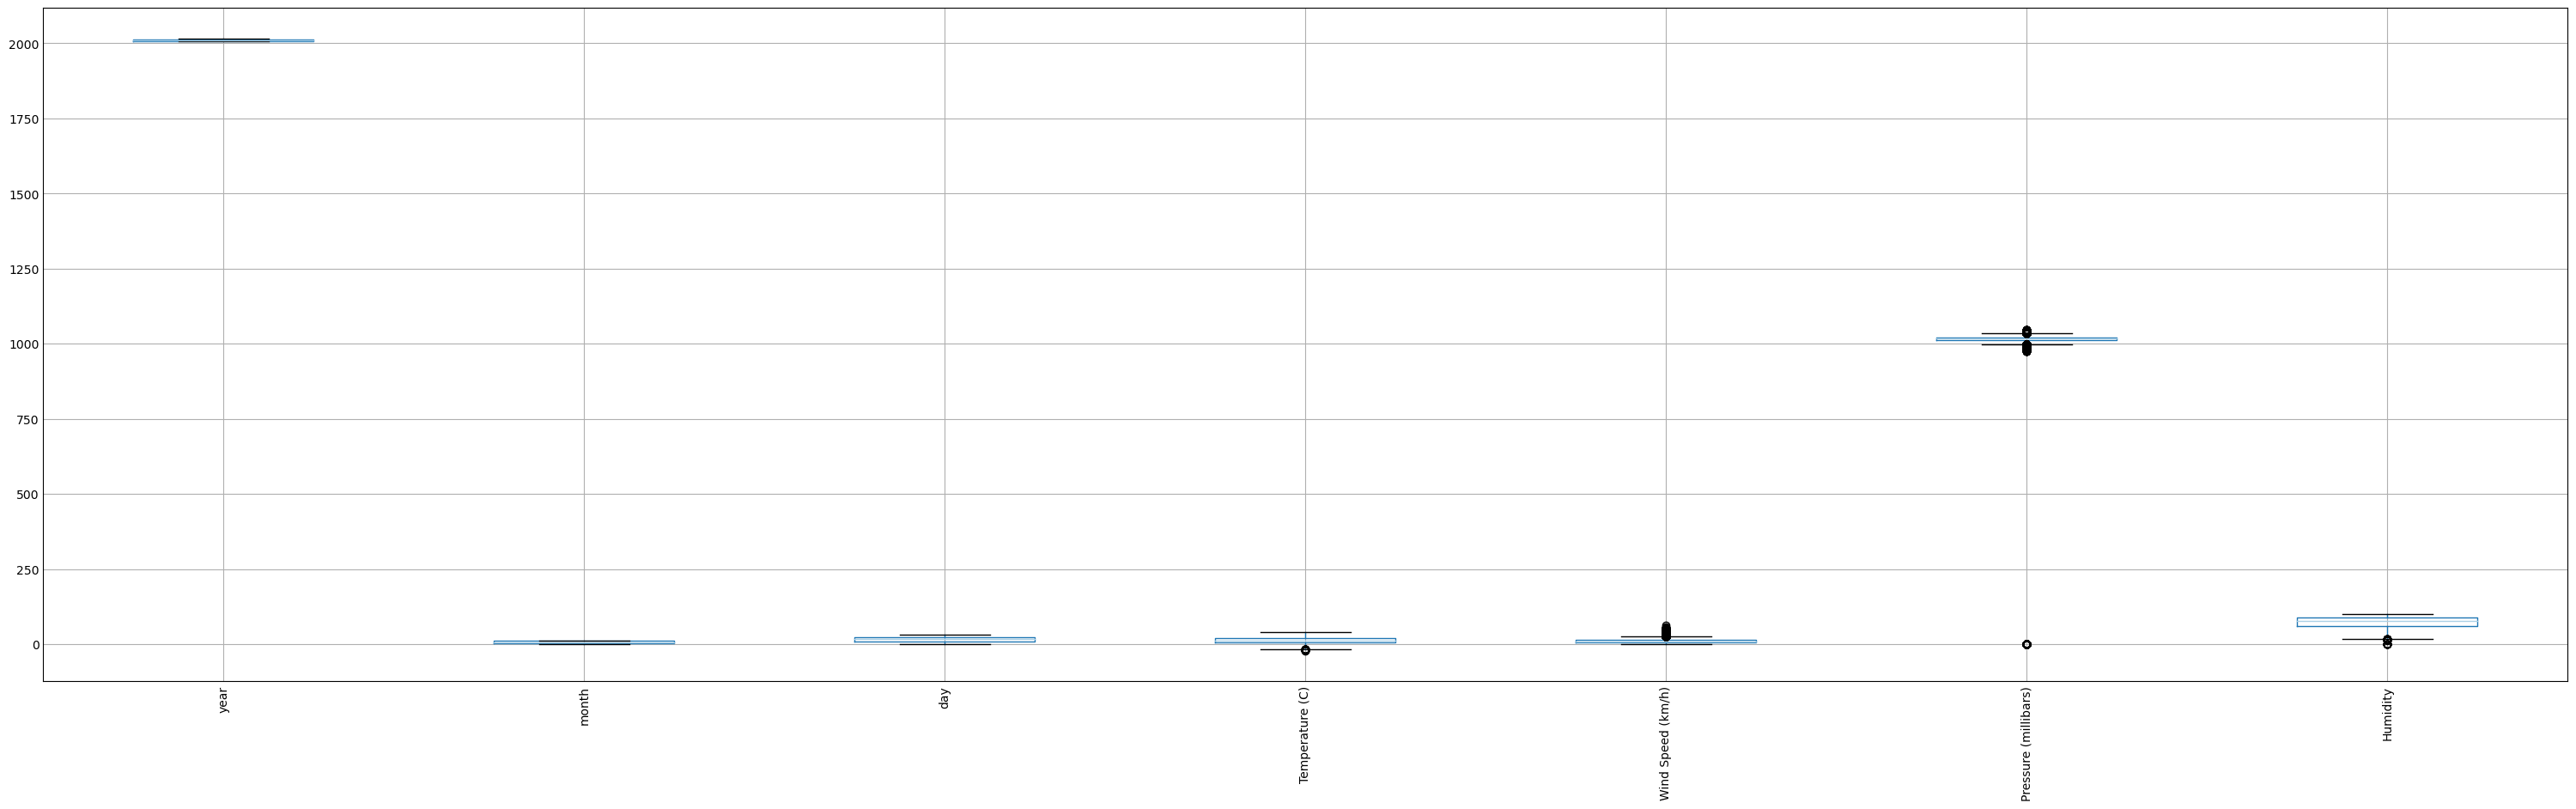

In [72]:
df5.boxplot(rot=90 , figsize=(30,8))

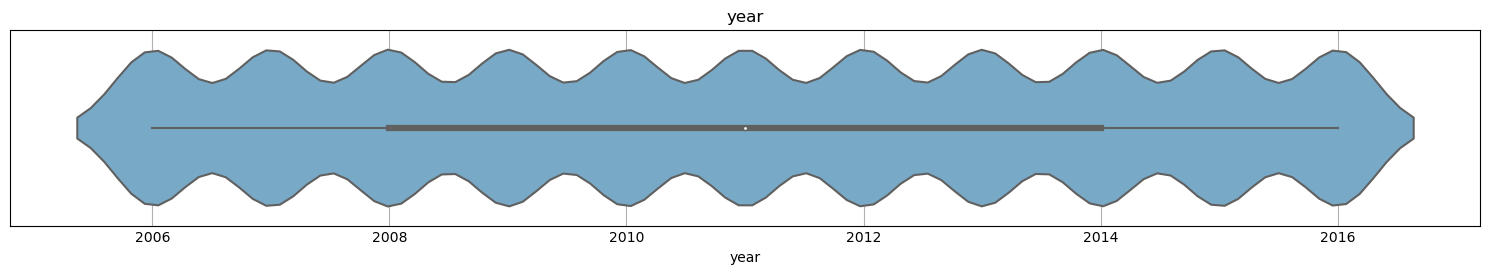

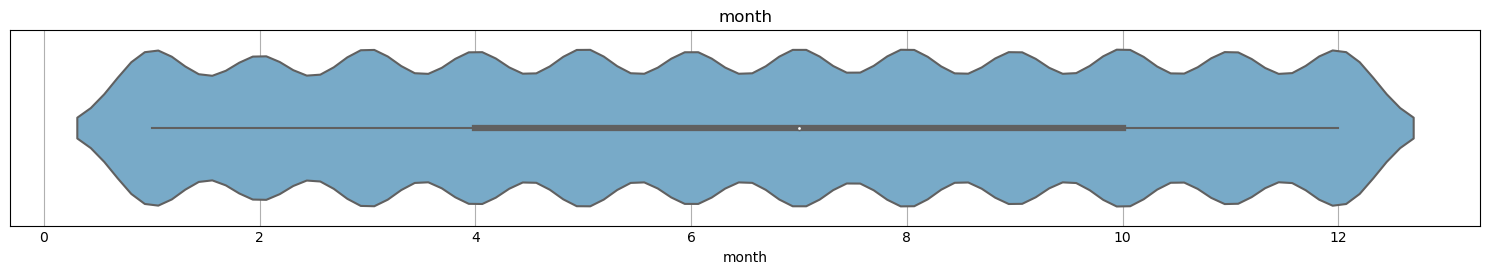

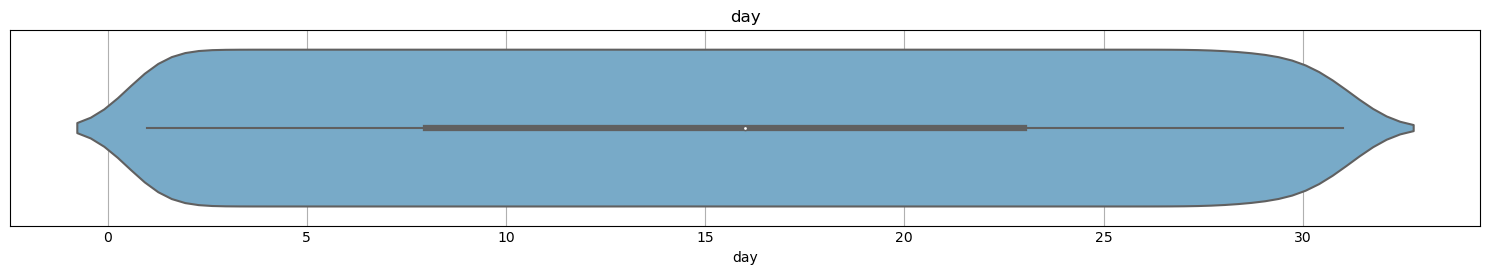

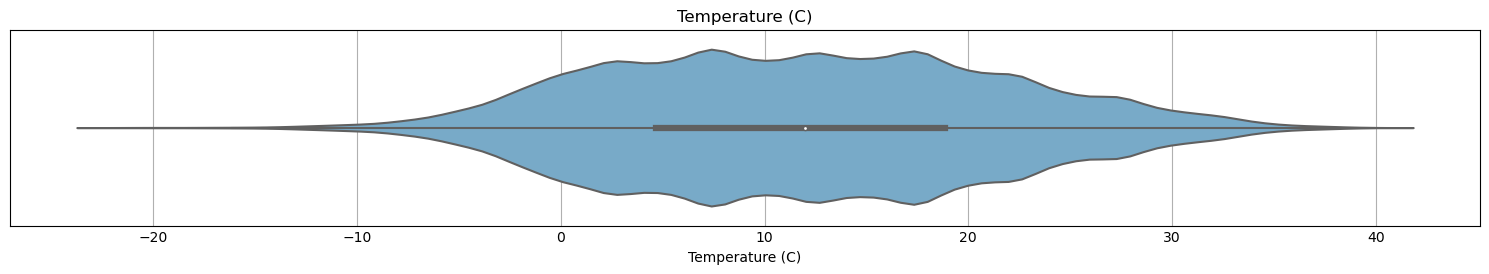

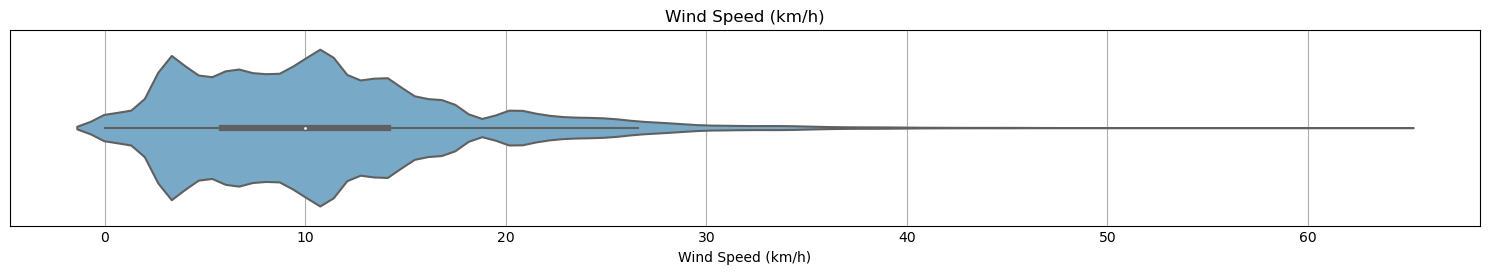

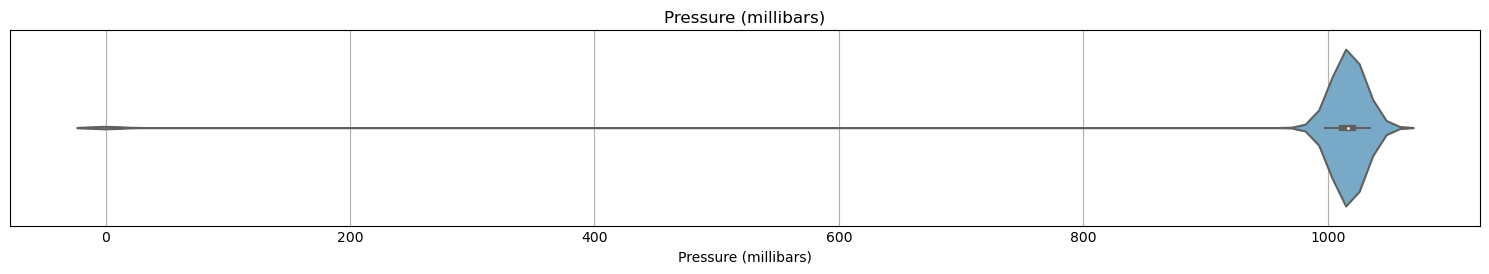

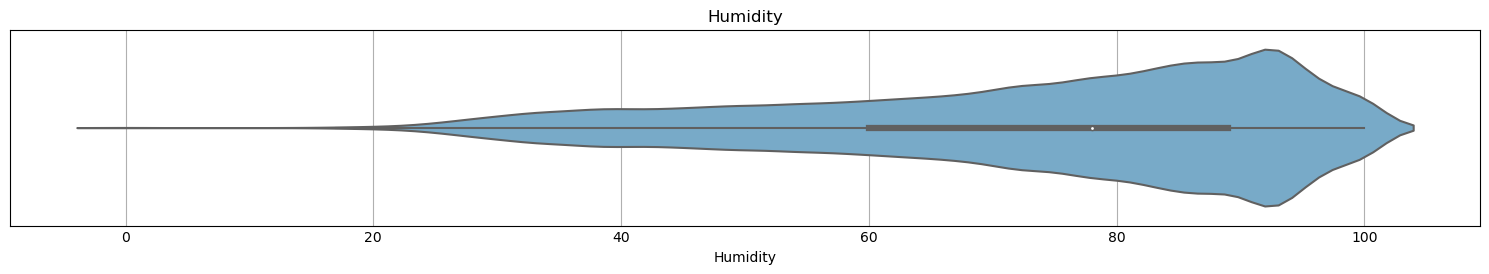

In [73]:
ff2 = ["year","month","day","Temperature (C)","Wind Speed (km/h)","Pressure (millibars)","Humidity"]
palette ="Blues"
for column in ff2:
    plt.figure(figsize=(15,2))
    sns.violinplot(x=df5[column], palette=palette)
    plt.title(column)
    plt.show()


year Statistics:
count: 96429.00, mean: 2011.00, std: 3.16, min: 2006.00, 25%: 2008.00, 50%: 2011.00, 75%: 2014.00, max: 2016.00


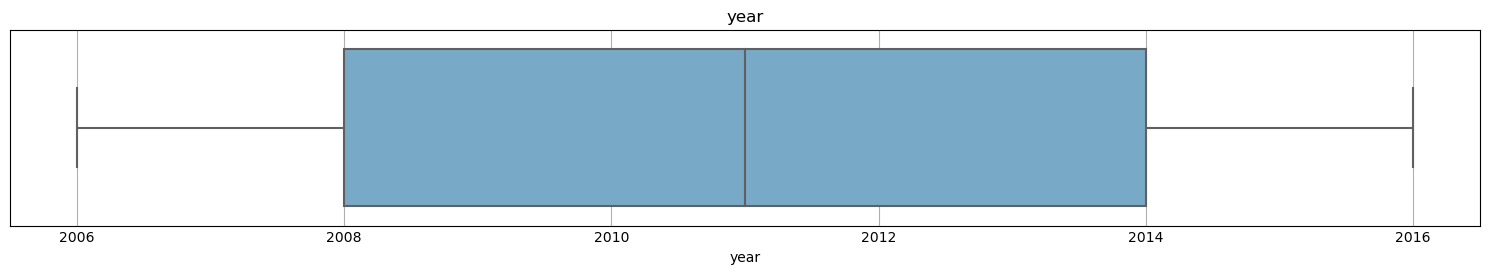


month Statistics:
count: 96429.00, mean: 6.52, std: 3.45, min: 1.00, 25%: 4.00, 50%: 7.00, 75%: 10.00, max: 12.00


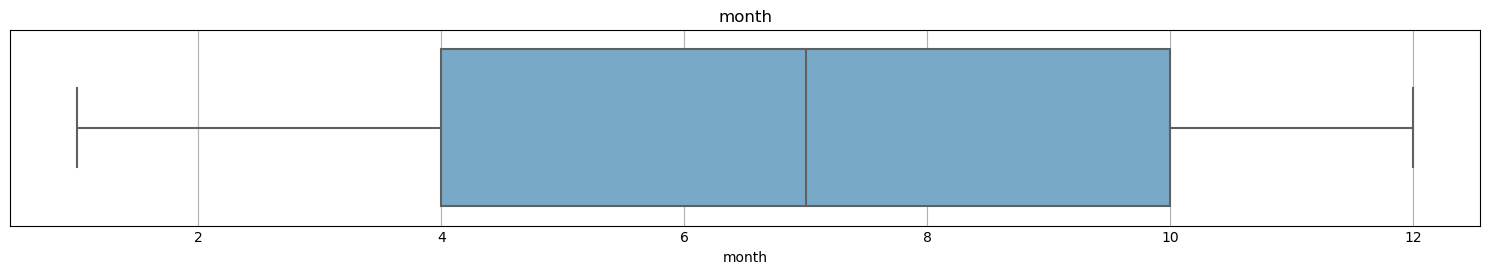


day Statistics:
count: 96429.00, mean: 15.73, std: 8.80, min: 1.00, 25%: 8.00, 50%: 16.00, 75%: 23.00, max: 31.00


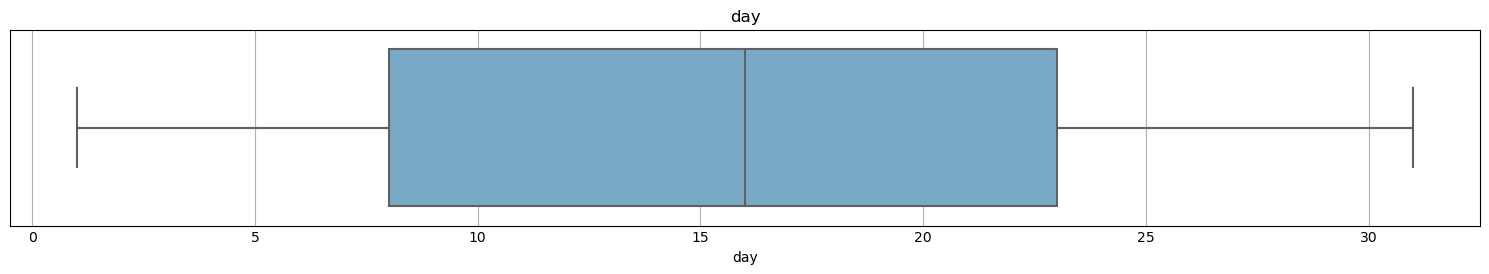


Temperature (C) Statistics:
count: 96429.00, mean: 11.93, std: 9.55, min: -21.82, 25%: 4.68, 50%: 12.00, 75%: 18.84, max: 39.91


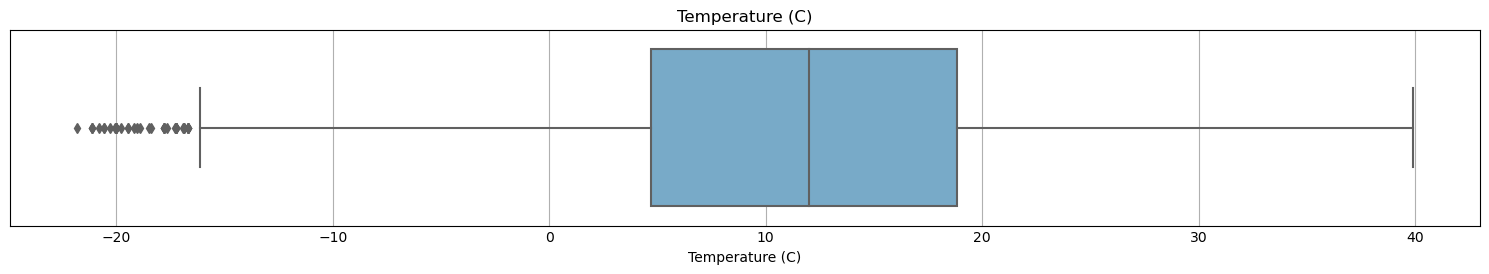


Wind Speed (km/h) Statistics:
count: 96429.00, mean: 10.81, std: 6.91, min: 0.00, 25%: 5.83, 50%: 9.97, 75%: 14.14, max: 63.85


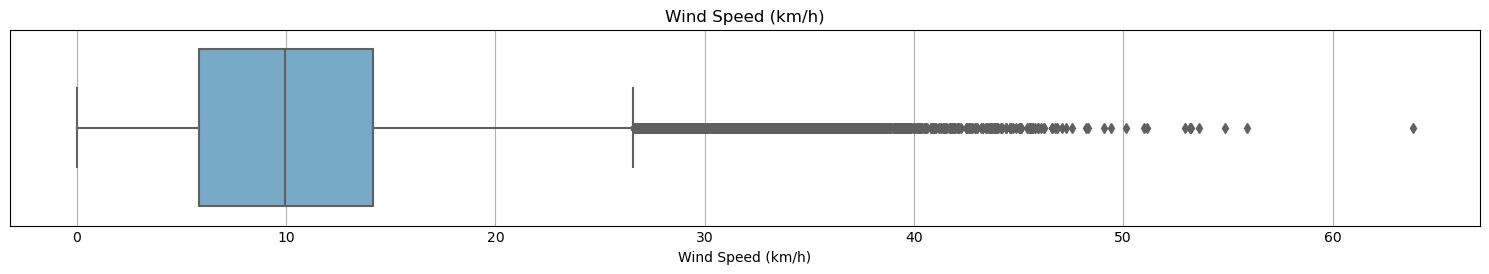


Pressure (millibars) Statistics:
count: 96429.00, mean: 1003.23, std: 116.98, min: 0.00, 25%: 1011.90, 50%: 1016.45, 75%: 1021.09, max: 1046.38


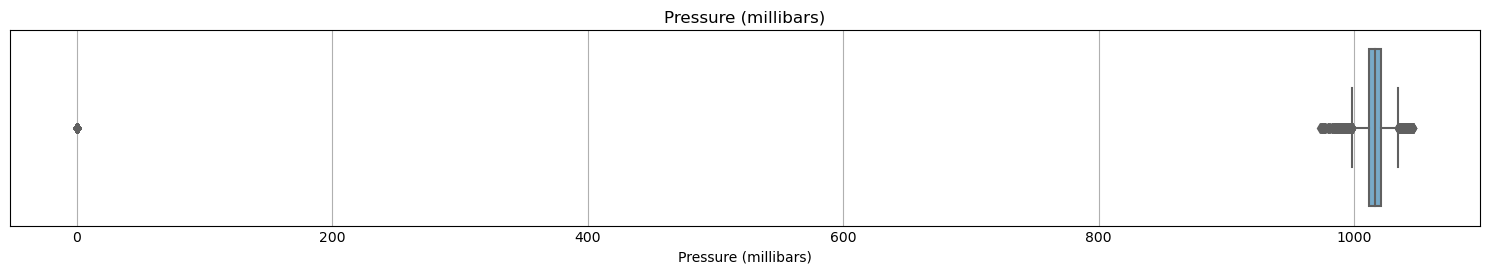


Humidity Statistics:
count: 96429.00, mean: 73.49, std: 19.55, min: 0.00, 25%: 60.00, 50%: 78.00, 75%: 89.00, max: 100.00


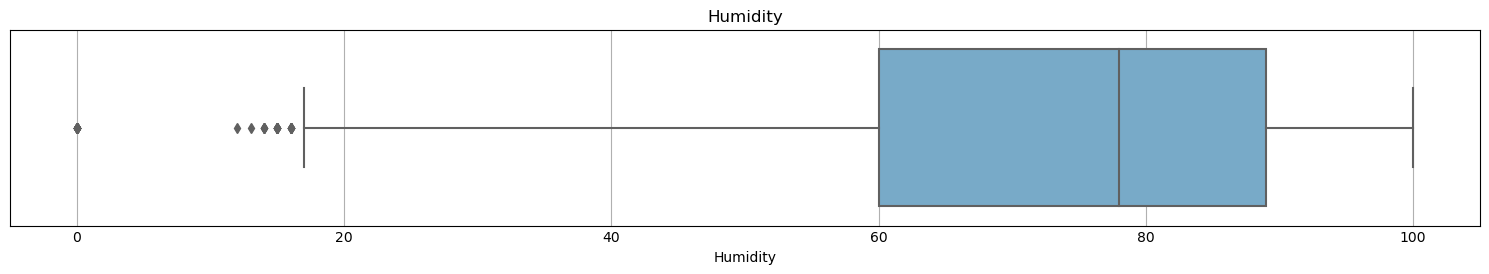

In [74]:
palette ="Blues"
for column in ff2:
    plt.figure(figsize=(15,2))
    sns.boxplot(x=df5[column], palette=palette)
    plt.title(column)
    stats = df5[column].describe()
    stats_text = ", ".join([f"{key}: {value:.2f}" for key, value in stats.items()])
    print(f"\n{column} Statistics:\n{stats_text}")
    plt.show()

<Axes: xlabel='Precip Type', ylabel='Humidity'>

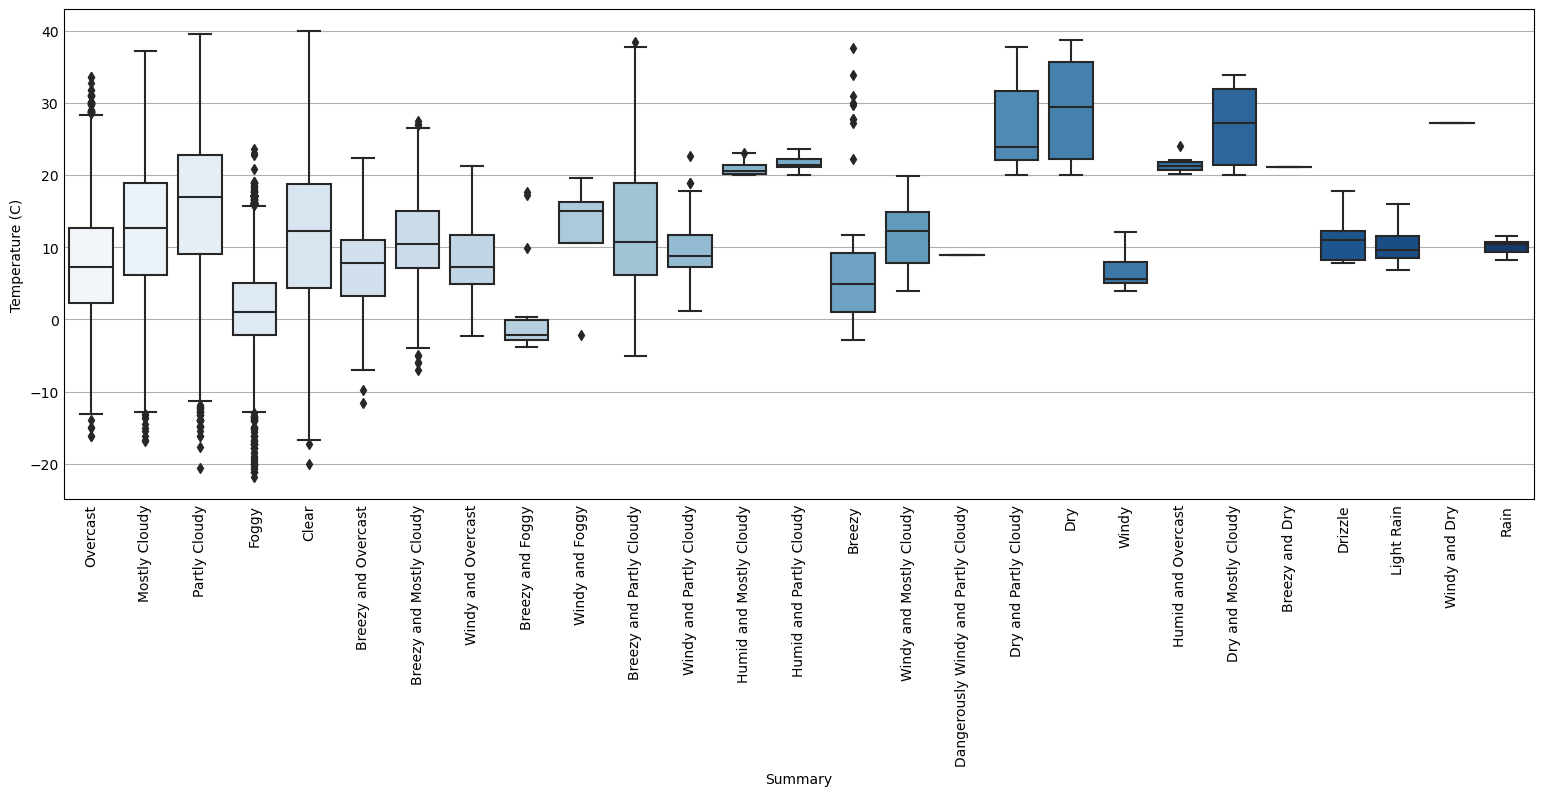

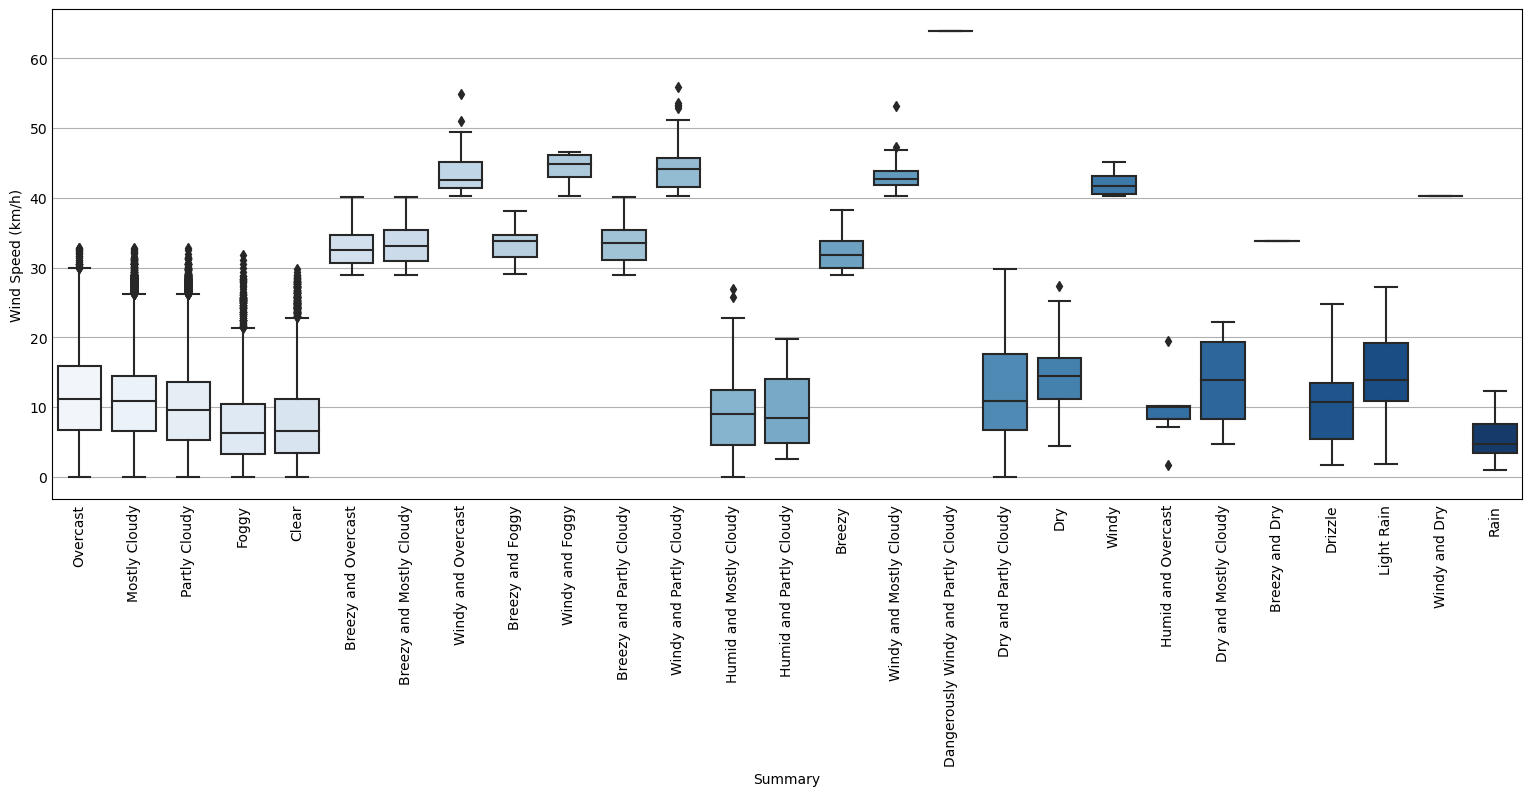

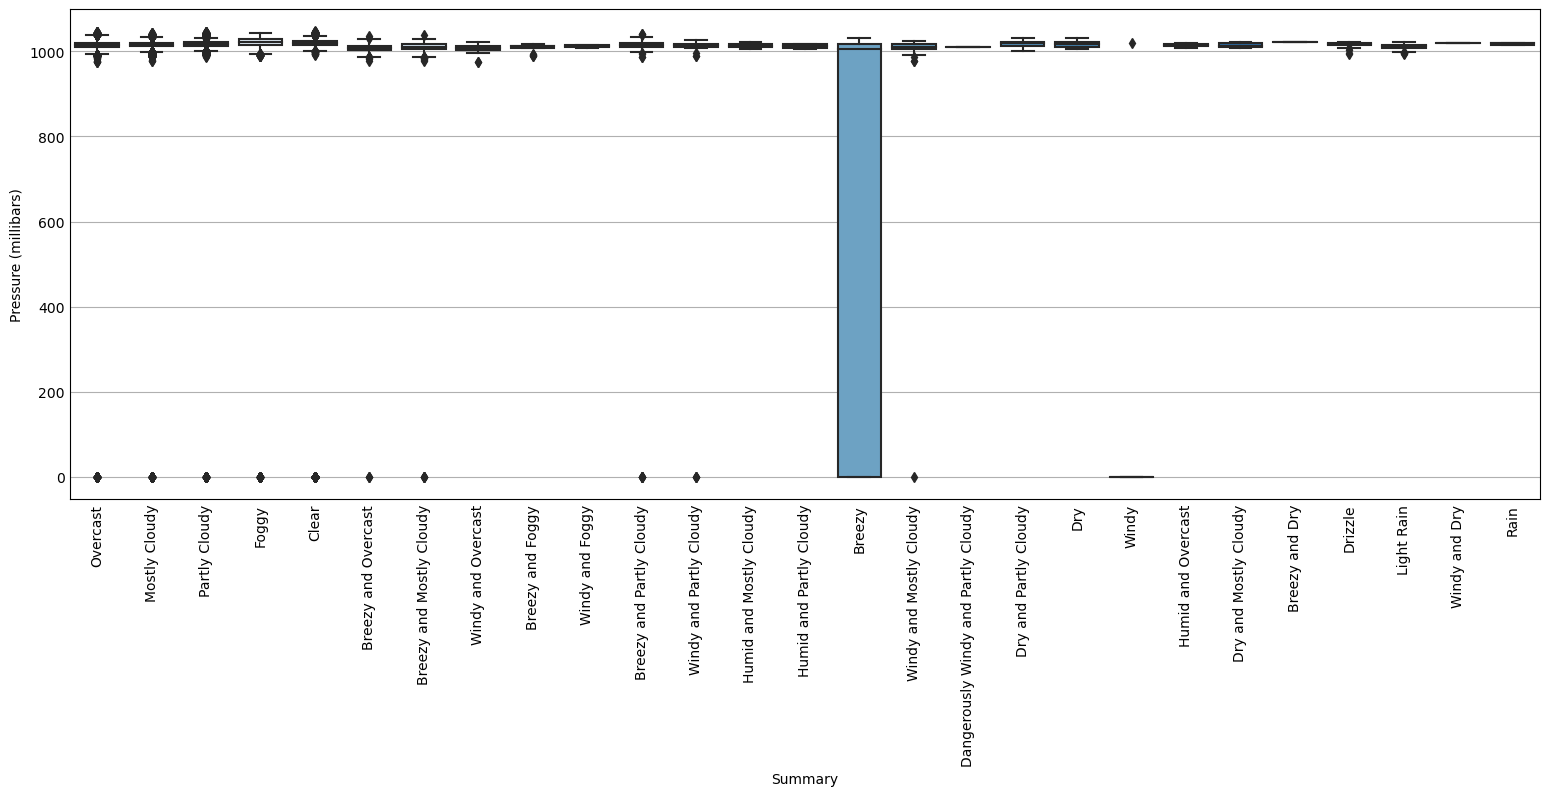

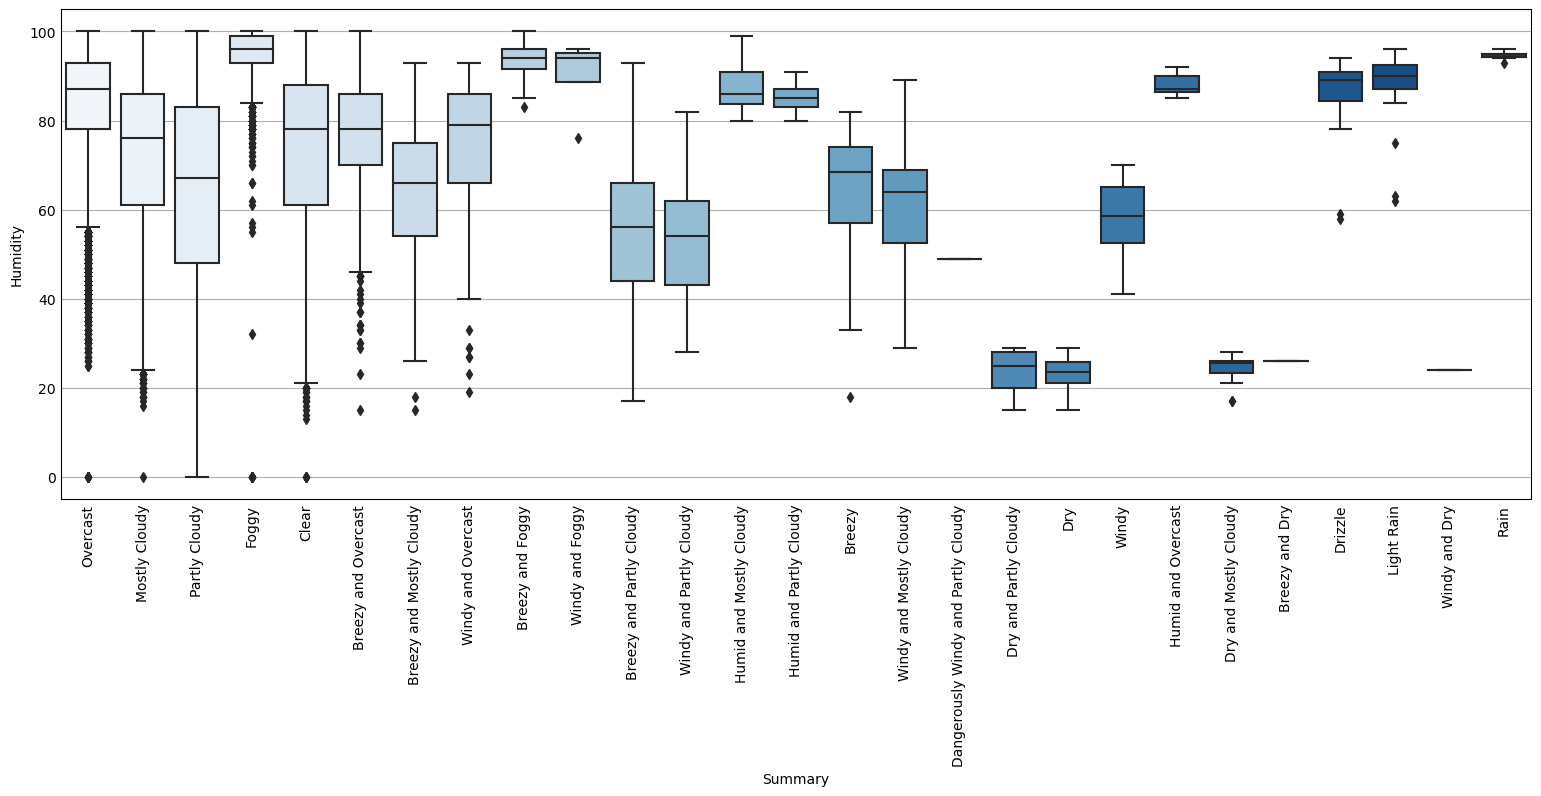

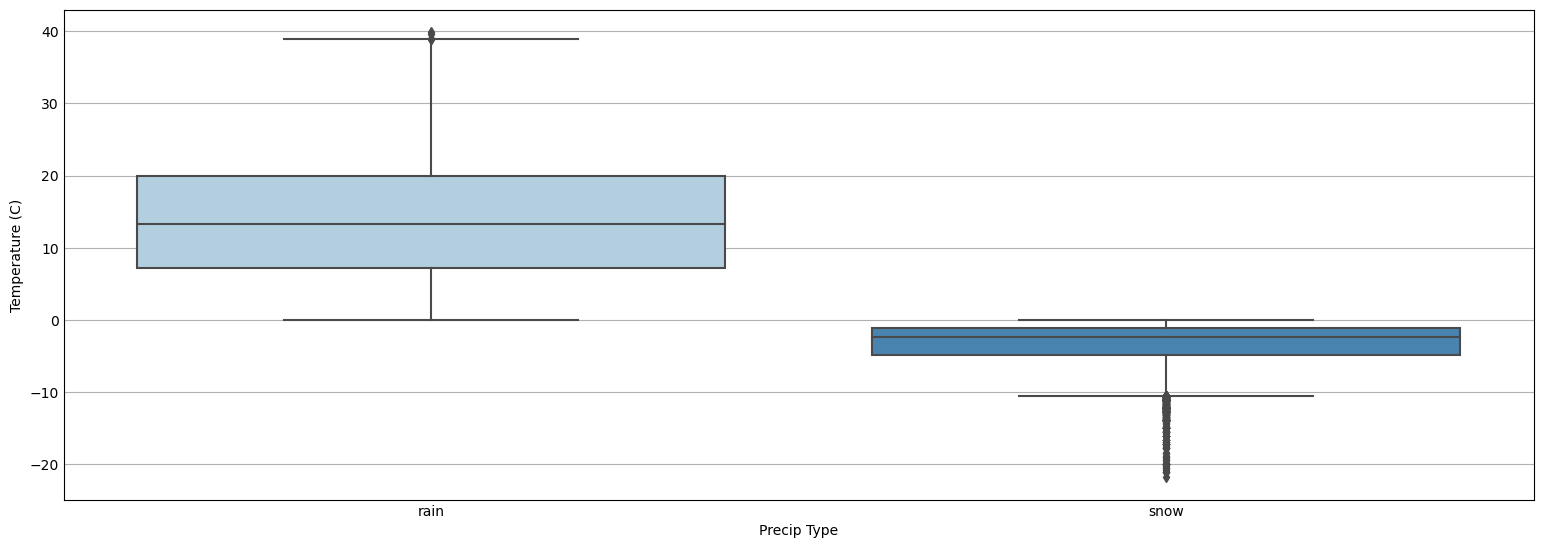

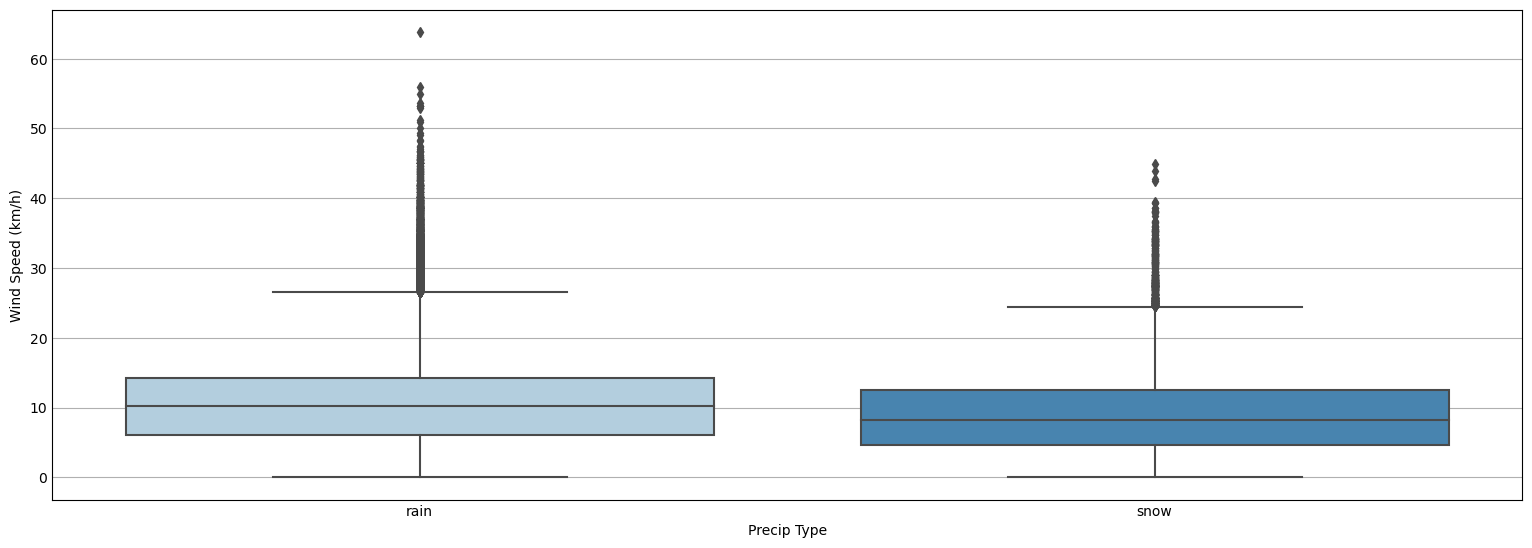

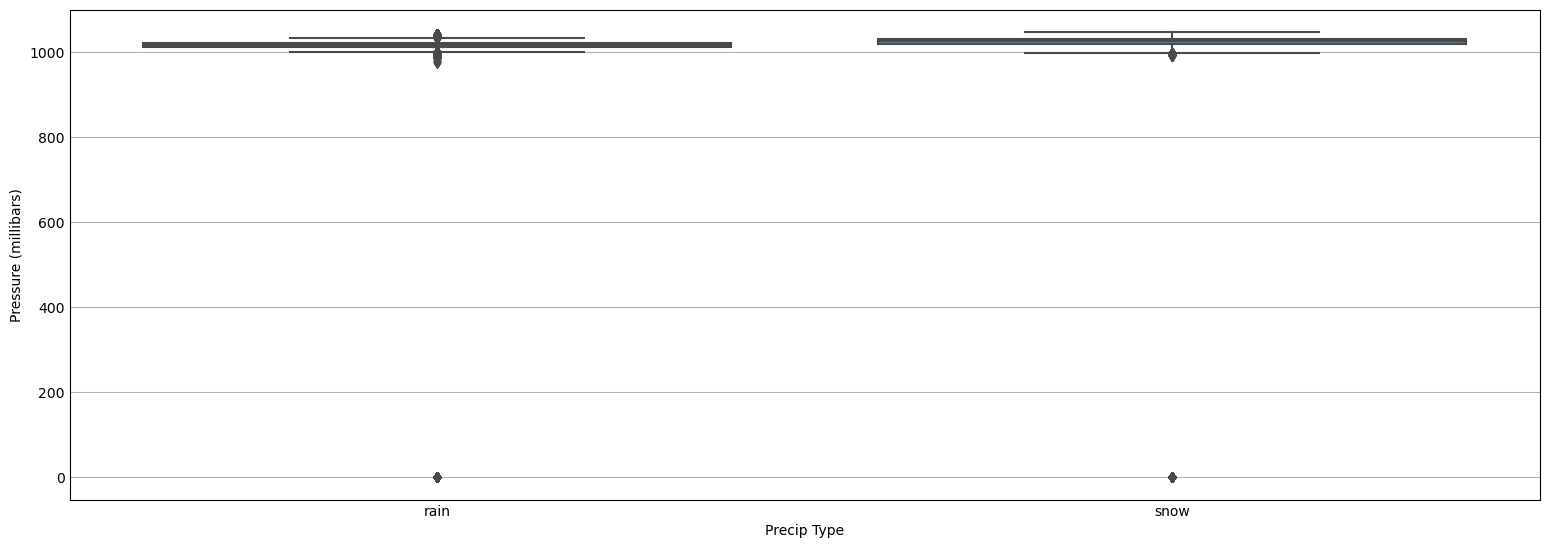

In [75]:
df6=pd.DataFrame(df3,columns=["Precip Type", "Summary","year","month","day","Temperature (C)","Wind Speed (km/h)","Pressure (millibars)","Humidity"])
plt.subplots(figsize=(15,5))
sns.boxplot(x='Summary', y='Temperature (C)', data=df6, palette='Blues')
plt.xticks(rotation=90)
plt.subplots(figsize=(15,5))
sns.boxplot(x='Summary', y='Wind Speed (km/h)', data=df6, palette='Blues')
plt.xticks(rotation=90)
plt.subplots(figsize=(15,5))
sns.boxplot(x='Summary', y='Pressure (millibars)', data=df6, palette='Blues')
plt.xticks(rotation=90)
plt.subplots(figsize=(15,5))
sns.boxplot(x='Summary', y='Humidity', data=df6, palette='Blues')
plt.xticks(rotation=90)
plt.subplots(figsize=(15,5))
sns.boxplot(x='Precip Type', y='Temperature (C)', data=df6, palette='Blues')
plt.subplots(figsize=(15,5))
sns.boxplot(x='Precip Type', y='Wind Speed (km/h)', data=df6, palette='Blues')
plt.subplots(figsize=(15,5))
sns.boxplot(x='Precip Type', y='Pressure (millibars)', data=df6, palette='Blues')
plt.subplots(figsize=(15,5))
sns.boxplot(x='Precip Type', y='Humidity', data=df6, palette='Blues')

In [79]:
Country_Means = df3.groupby('Precip Type')[['Temperature (C)', 'Pressure (millibars)', 'Wind Speed (km/h)','Humidity']].mean()
colors =  ['#1f77b4', '#f4a261', '#2ca02c', '#d62728']

Country_Means.plot(kind='bar', figsize=(12, 7), color=colors)
plt.title("The influence of the Temperature (C), Pressure (millibars), Wind Speed (km/h) & Humidity")
plt.xlabel('Precip Type')
plt.ylabel('Average')
plt.show()

In [80]:
max_humidity_by_summary = df3.groupby('Summary')['Humidity'].mean().sort_values(ascending=False)
order = max_humidity_by_summary.index.tolist()
plt.figure(figsize=(25, 10))
sns.barplot(x='Humidity', y='Summary', data=df3, order=order, palette='Blues')
for index, value in enumerate(max_humidity_by_summary):
    plt.text(value, index, f' {round(value , 2)}', va='center')
plt.xlabel('Humidity')
plt.ylabel('Summary')
plt.title('Maximum Humidity by Summary')
plt.show()

Summary:

England experiences a range of weather conditions based on temperature.

Below freezing, the weather is typically foggy.

Around zero degrees Celsius, skies are mostly partly cloudy, cloudy, overcast, or clear.

Fog persists between zero and 10 degrees Celsius.

Temperatures exceeding 30 degrees Celsius often result in partly cloudy conditions.

Snowfall occurs at sub-zero temperatures.